In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('survey_enc.csv')

In [5]:
df.head()

,Age,Education Level,Anxiety_Level,Stress_Level,Anxiety_Symptoms_Frequency,Overwhelmed_Frequency,Control_Loss_Days,Sleep_Quality,Sleep_Trouble_Frequency,Physical_Activity_Frequency,...,Occupation_Unemployed,Job Level _Entry-Level,Job Level _Mid-Level,Job Level _Not Applicable,Job Level _Senior-Level,Sleep_Hours_5-6 hours,Sleep_Hours_6-7 hours,Sleep_Hours_7-8 hours,Sleep_Hours_<5 hours,Sleep_Hours_>8 hours
0,2,1,4.5,4.5,3,4,5,4,3,5,...,False,True,False,False,False,False,True,False,False,False
1,2,1,5.0,5.0,4,3,3,3,2,5,...,False,False,False,True,False,True,False,False,False,False
2,2,2,4.5,3.5,4,4,3,3,3,4,...,False,True,False,False,False,False,True,False,False,False
3,2,2,3.5,2.0,4,4,3,3,4,2,...,False,True,False,False,False,False,True,False,False,False
4,2,1,4.0,3.5,3,3,4,1,4,4,...,False,False,False,True,False,False,False,False,True,False


In [6]:
bool_columns = ['Gender_Man', 'Gender_Woman', 'Gender_Non Binary','Gender_Trans Man','Gender_Trans Woman','Gender_Genderfluid','Gender_Other','Gender_Prefer Not to Say','Occupation_Job Professional'
,'Occupation_Other','Occupation_Self - Employed','Occupation_Student','Occupation_Unemployed','Job Level _Entry-Level','Job Level _Mid-Level','Job Level _Not Applicable','Job Level _Senior-Level',
'Sleep_Hours_5-6 hours','Sleep_Hours_6-7 hours','Sleep_Hours_7-8 hours','Sleep_Hours_<5 hours','Sleep_Hours_>8 hours']  # list of boolean columns
df[bool_columns] = df[bool_columns].astype(int)

In [7]:
df

,Age,Education Level,Anxiety_Level,Stress_Level,Anxiety_Symptoms_Frequency,Overwhelmed_Frequency,Control_Loss_Days,Sleep_Quality,Sleep_Trouble_Frequency,Physical_Activity_Frequency,...,Occupation_Unemployed,Job Level _Entry-Level,Job Level _Mid-Level,Job Level _Not Applicable,Job Level _Senior-Level,Sleep_Hours_5-6 hours,Sleep_Hours_6-7 hours,Sleep_Hours_7-8 hours,Sleep_Hours_<5 hours,Sleep_Hours_>8 hours
0,2,1,4.5,4.5,3,4,5,4,3,5,...,0,1,0,0,0,0,1,0,0,0
1,2,1,5.0,5.0,4,3,3,3,2,5,...,0,0,0,1,0,1,0,0,0,0
2,2,2,4.5,3.5,4,4,3,3,3,4,...,0,1,0,0,0,0,1,0,0,0
3,2,2,3.5,2.0,4,4,3,3,4,2,...,0,1,0,0,0,0,1,0,0,0
4,2,1,4.0,3.5,3,3,4,1,4,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2,1,3.5,4.0,4,3,1,4,3,3,...,0,0,0,1,0,0,0,1,0,0
99,2,1,3.5,2.5,5,5,2,3,4,3,...,0,1,0,0,0,1,0,0,0,0
100,3,2,4.0,5.0,3,4,2,3,4,2,...,0,1,0,0,0,0,0,1,0,0
101,2,2,3.5,3.5,4,4,1,3,4,4,...,0,0,0,1,0,0,1,0,0,0


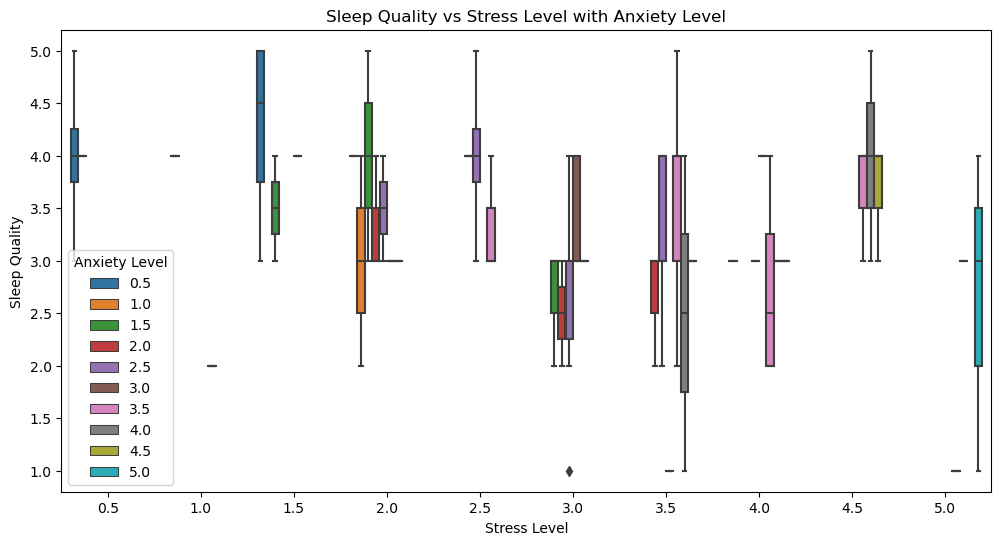

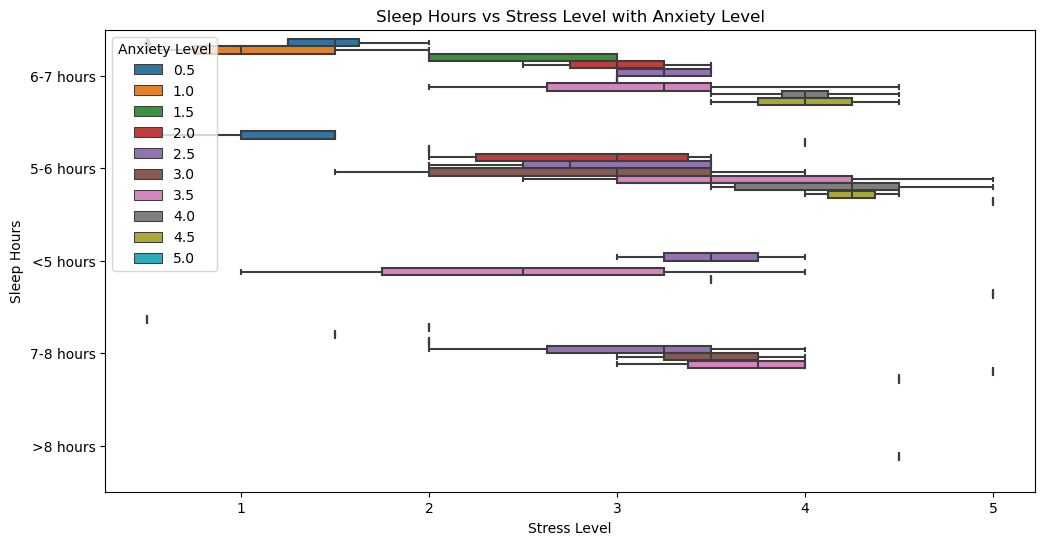

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains the columns for 'Sleep_Quality', 'Stress_Level', 'Anxiety_Level', and the one-hot encoded 'Sleep_Hours' columns

#Convert one-hot encoded Sleep_Hours columns to a single categorical column
sleep_hours_columns = [
    'Sleep_Hours_5-6 hours',
    'Sleep_Hours_6-7 hours',
    'Sleep_Hours_7-8 hours',
    'Sleep_Hours_<5 hours',
    'Sleep_Hours_>8 hours'
]

# Map column names to categorical values
sleep_hours_mapping = {
    'Sleep_Hours_5-6 hours': '5-6 hours',
    'Sleep_Hours_6-7 hours': '6-7 hours',
    'Sleep_Hours_7-8 hours': '7-8 hours',
    'Sleep_Hours_<5 hours': '<5 hours',
    'Sleep_Hours_>8 hours': '>8 hours'
}

# Extract the sleep hour category based on the true one-hot encoded column
df['Sleep_Hours'] = df[sleep_hours_columns].idxmax(axis=1).map(sleep_hours_mapping)

# Plot Sleep_Quality vs. Stress_Level
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Stress_Level', y='Sleep_Quality', hue='Anxiety_Level')
plt.title('Sleep Quality vs Stress Level with Anxiety Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Quality')
plt.legend(title='Anxiety Level')
plt.show()

# Plot Sleep_Hours vs. Stress_Level
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Stress_Level', y='Sleep_Hours', hue='Anxiety_Level')
plt.title('Sleep Hours vs Stress Level with Anxiety Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Hours')
plt.legend(title='Anxiety Level')
plt.show()


## The first box plot shows:

Low Stress, High Sleep Quality: Participants with lower stress levels tend to have higher sleep quality, and they often report lower anxiety levels.
High Stress, Low Sleep Quality: Higher stress levels generally correspond to lower sleep quality, and the anxiety levels at these stress levels tend to be more varied.
Mixed Anxiety Levels at Moderate Stress: At certain moderate stress levels (around 2.5 to 3.5), there is a range of sleep quality ratings, indicating that even at moderate stress, some participants experience good sleep quality while others do not. Anxiety levels are also quite varied in this range.

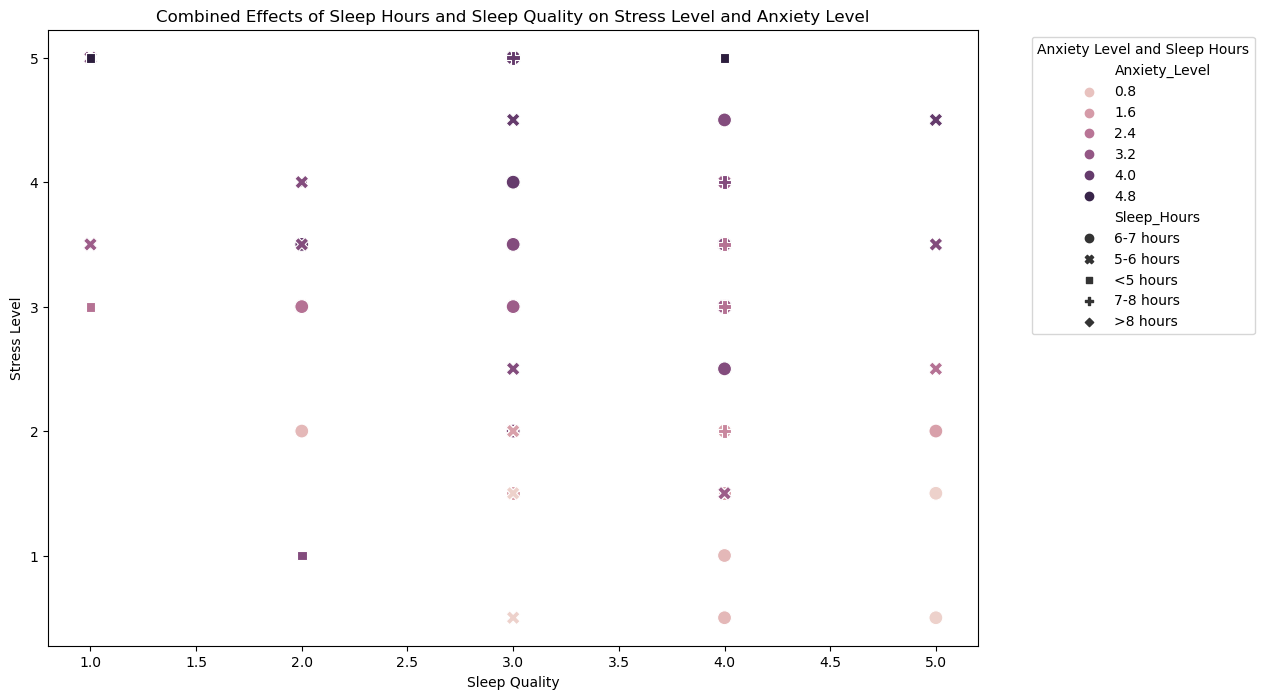

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to show combined effects of Sleep_Hours and Sleep_Quality on Stress_Level and Anxiety_Level
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Sleep_Quality',         # Sleep Quality on x-axis
    y='Stress_Level',          # Stress Level on y-axis
    hue='Anxiety_Level',       # Color points by Anxiety Level
    style='Sleep_Hours',       # Different marker styles for Sleep Hours
    s=100                      # Marker size for better visibility
)

plt.title('Combined Effects of Sleep Hours and Sleep Quality on Stress Level and Anxiety Level')
plt.xlabel('Sleep Quality')
plt.ylabel('Stress Level')
plt.legend(title='Anxiety Level and Sleep Hours', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


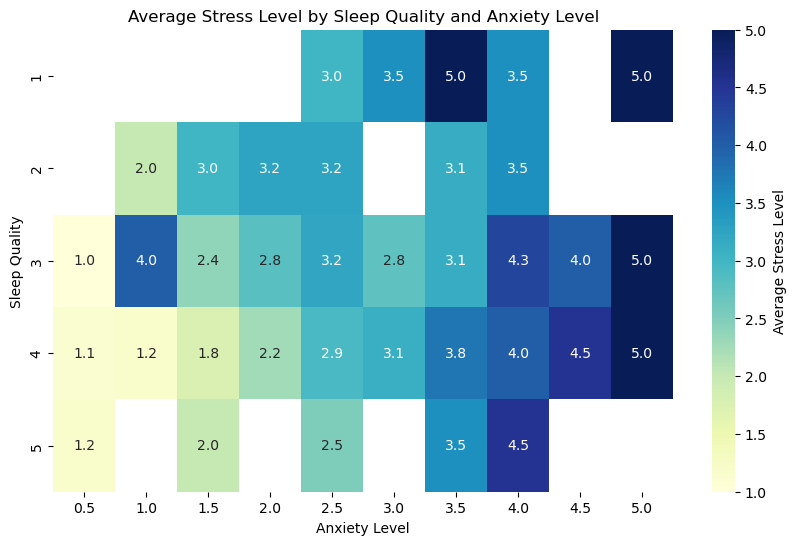

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pivot the data for heatmap
df_quality_anxiety = df.pivot_table(values='Stress_Level', index='Sleep_Quality', columns='Anxiety_Level', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_quality_anxiety, annot=True, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': 'Average Stress Level'})
plt.title('Average Stress Level by Sleep Quality and Anxiety Level')
plt.xlabel('Anxiety Level')
plt.ylabel('Sleep Quality')
plt.show()

## Axes:
X-Axis (Anxiety Level): Anxiety levels, ranging approximately from 0.5 to 5.
Y-Axis (Sleep Quality): Sleep quality ratings, also on a scale from 1 to 5, where 1 represents very poor sleep quality and 5 represents very high sleep quality.
## Color Scale:
The color of each cell represents the average stress level for the corresponding combination of anxiety level and sleep quality.
Light colors (yellow to light green) represent lower average stress levels.
Darker colors (dark green to blue) indicate higher average stress levels.
Observations:
Low Sleep Quality and High Anxiety Correlate with High Stress:

#### In the top-right corner of the heatmap, where sleep quality is low (1 or 2) and anxiety level is high (4.5 or 5), the average stress level reaches its maximum (5).
This suggests that people with poor sleep quality and high anxiety levels report the highest stress levels.
High Sleep Quality and Low Anxiety Correlate with Low Stress:

### In the bottom-left corner, where sleep quality is high (4 or 5) and anxiety levels are low (0.5 or 1), the average stress level is at its minimum (around 1 or 1.2).

This pattern suggests that people who sleep well and experience low anxiety report the lowest levels of stress.
Moderate Stress Levels with Moderate Sleep Quality and Anxiety:

In the center of the heatmap, with moderate sleep quality (around 3) and moderate anxiety levels (around 2 to 3), the average stress levels range from 2.4 to 3.2.
#### This indicates that stress levels increase gradually as sleep quality declines and anxiety levels rise.
Anxiety’s Impact on Stress is Stronger at Lower Sleep Quality:

When sleep quality is low (1 or 2), an increase in anxiety levels (from 2 to 5) leads to a noticeable increase in average stress levels.
In contrast, at higher sleep quality (4 or 5), the increase in anxiety does not lead to as sharp a rise in stress levels, suggesting that good sleep quality may help mitigate the impact of anxiety on stress.
Conclusions:
Poor Sleep Quality and High Anxiety Levels are Major Predictors of High Stress: Individuals who report both poor sleep and high anxiety levels tend to experience the highest stress levels.
Good Sleep Quality Appears to Buffer Against Stress: High sleep quality, even with moderate anxiety levels, is associated with lower stress. This indicates that improving sleep quality might be an effective strategy to reduce stress, even if anxiety levels are present.
Moderate Levels of Each Factor Correlate with Moderate Stress: The heatmap demonstrates a gradient effect where both sleep quality and anxiety contribute to stress in a proportional manner.

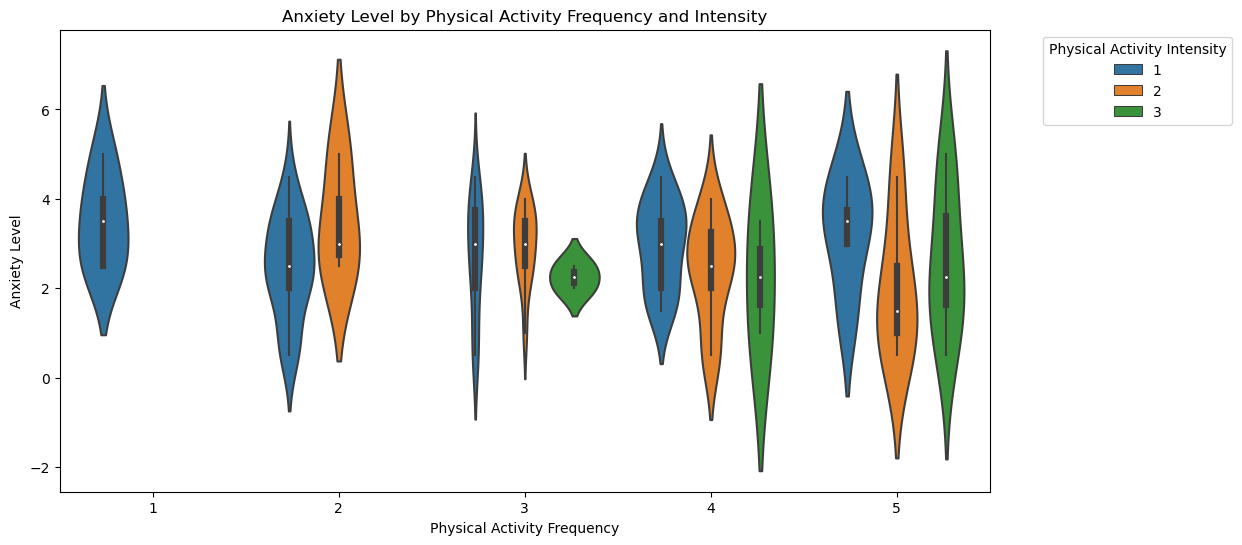

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Physical_Activity_Frequency', y='Anxiety_Level', hue='Physical_Activity_Intensity')
plt.title('Anxiety Level by Physical Activity Frequency and Intensity')
plt.xlabel('Physical Activity Frequency')
plt.ylabel('Anxiety Level')
plt.legend(title='Physical Activity Intensity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### i can observe that anxiety levels are higher when physical activity intensity and frequency as low to the left side of the graph
#### on the right side of the graph we can se comparatively lower levels of anxiety level when intensity and freq of workout increases
#### however there are outliers


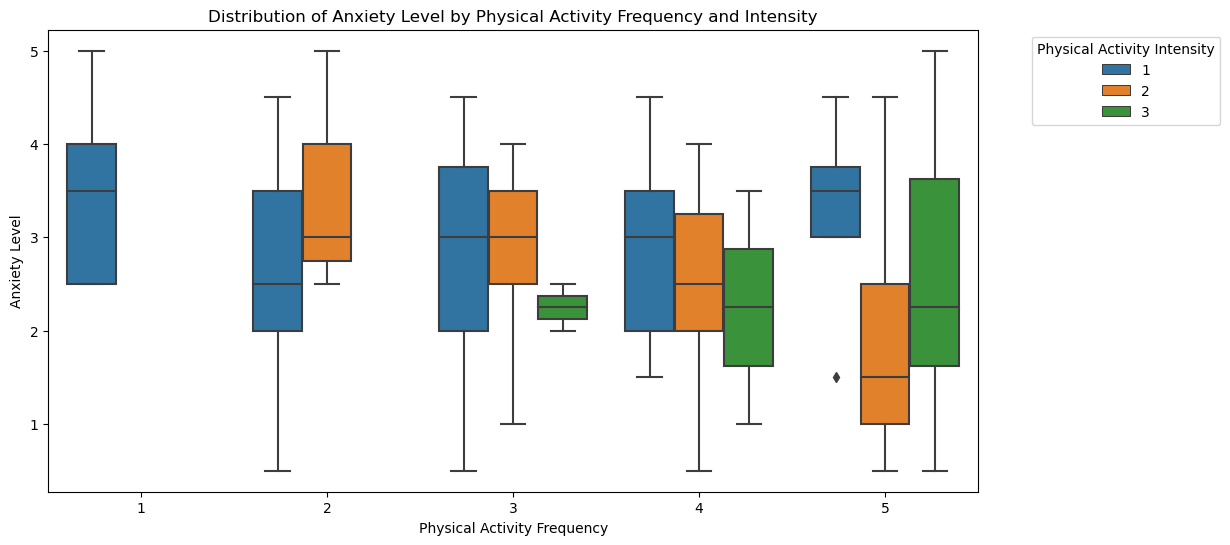

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Physical_Activity_Frequency', y='Anxiety_Level', hue='Physical_Activity_Intensity')
plt.title('Distribution of Anxiety Level by Physical Activity Frequency and Intensity')
plt.xlabel('Physical Activity Frequency')
plt.ylabel('Anxiety Level')
plt.legend(title='Physical Activity Intensity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### The outliers can clearly be observed in the box plot but the general trend via violin and box plot is that  lower frequency and intensity of physical acitvity potentially contributes to higher anxiety levels

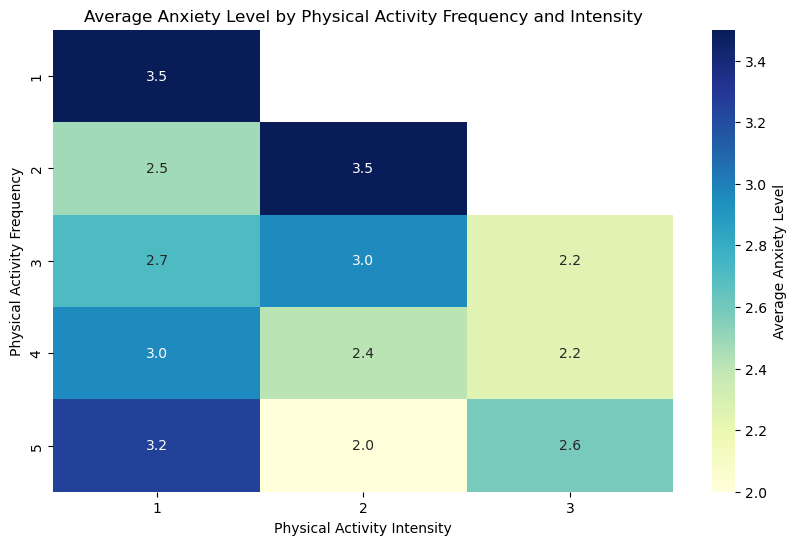

In [13]:
# Create a pivot table for mean Anxiety_Level
pivot_table = df.pivot_table(values='Anxiety_Level', index='Physical_Activity_Frequency', columns='Physical_Activity_Intensity', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': 'Average Anxiety Level'})
plt.title('Average Anxiety Level by Physical Activity Frequency and Intensity')
plt.xlabel('Physical Activity Intensity')
plt.ylabel('Physical Activity Frequency')
plt.show()


### Lower Anxiety Levels with Moderate to High Frequency and Intensity:

The lowest average anxiety levels (around 2.0 to 2.2) are observed among individuals who engage in physical activity with higher frequency (4-5 times a week) and with moderate to high intensity (Intensity levels 2-3).
This suggests that consistent and moderately intense physical activity may be associated with lower anxiety levels.

### High Anxiety Levels with Low Physical Activity Frequency:

The highest average anxiety levels (around 3.5) are found among individuals who report a physical activity frequency of only 1-2 times a week, regardless of intensity.
This pattern indicates that lower frequency of physical activity may correlate with higher anxiety, regardless of how intense the exercise is when performed.

### Intensity Alone is Not Sufficient to Lower Anxiety:

While higher intensities (especially at level 2) are associated with lower anxiety levels when combined with frequent physical activity, high intensity alone does not necessarily reduce anxiety if the frequency is low.
This observation implies that both consistency and a certain level of intensity might be important factors in mitigating anxiety, rather than intensity alone.

C:\Users\prave\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


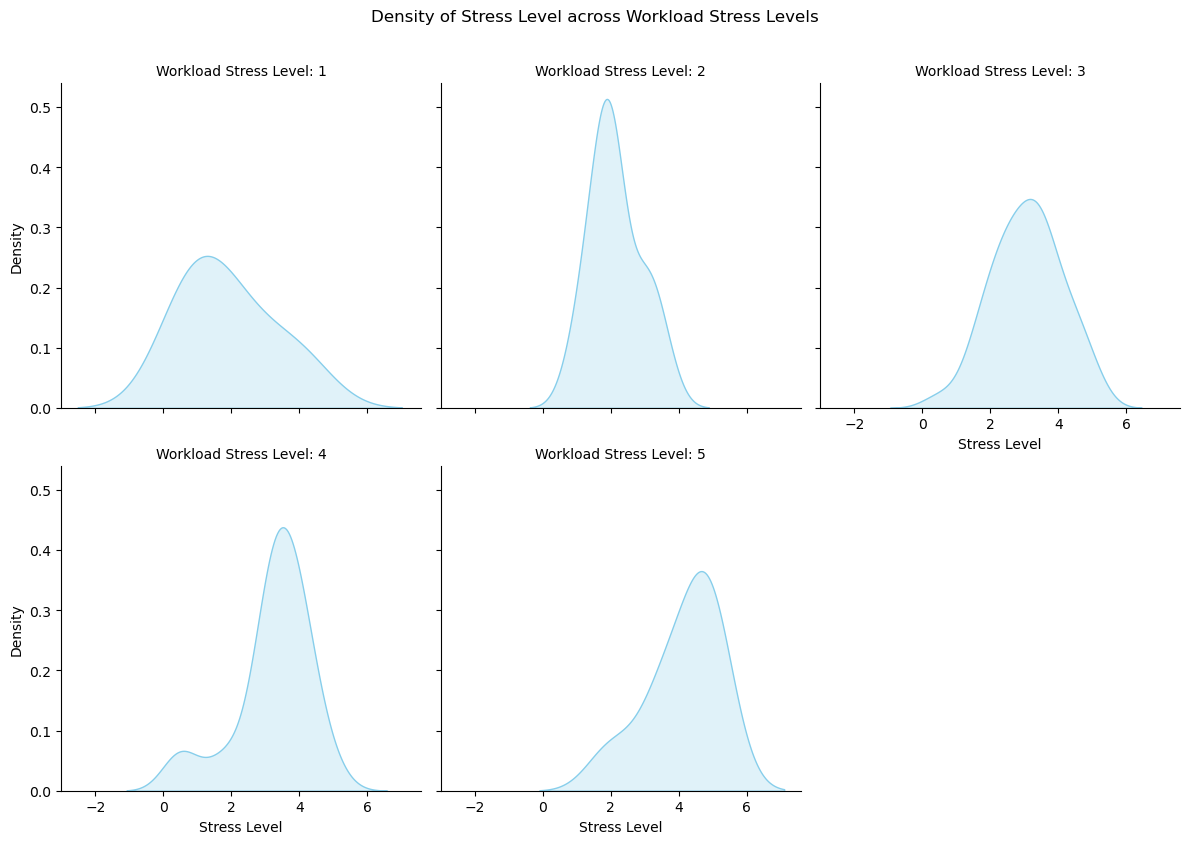

C:\Users\prave\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


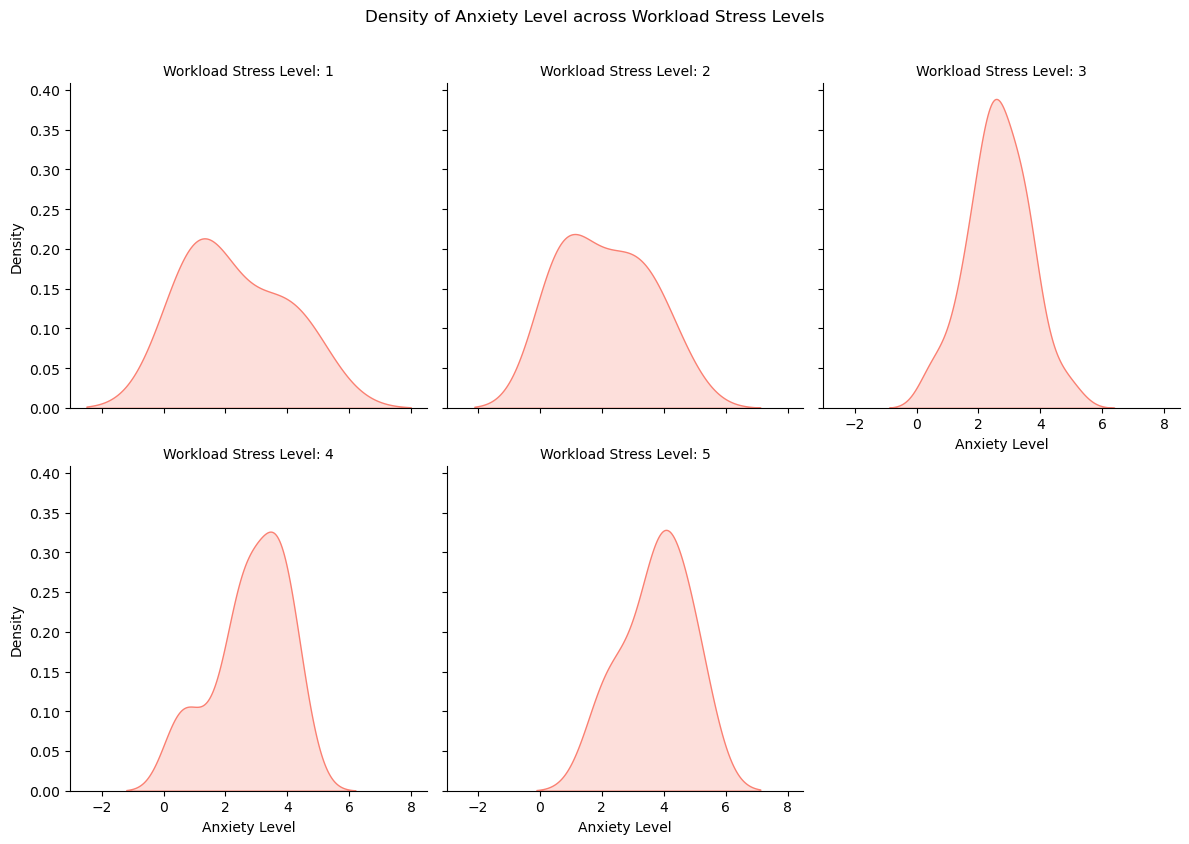

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up a facet grid for Stress_Level across Workload_Stress_Level
g = sns.FacetGrid(df, col="Workload_Stress_Level", col_wrap=3, height=4)
g.map(sns.kdeplot, "Stress_Level", color="skyblue", fill=True)
g.set_titles("Workload Stress Level: {col_name}")
g.set_axis_labels("Stress Level", "Density")
g.fig.suptitle("Density of Stress Level across Workload Stress Levels", y=1.05)
plt.show()

# Set up a facet grid for Anxiety_Level across Workload_Stress_Level
h = sns.FacetGrid(df, col="Workload_Stress_Level", col_wrap=3, height=4)
h.map(sns.kdeplot, "Anxiety_Level", color="salmon", fill=True)
h.set_titles("Workload Stress Level: {col_name}")
h.set_axis_labels("Anxiety Level", "Density")
h.fig.suptitle("Density of Anxiety Level across Workload Stress Levels", y=1.05)
plt.show()


Here are three key observations for each set of graphs:

### First Graph (Density of Stress Level across Workload Stress Levels)
1. **Increase in Stress Density with Workload Level**: As the workload stress level increases from 1 to 5, the density distribution of stress level becomes more concentrated and skewed towards higher values, especially at levels 4 and 5.
2. **Distribution Shape Variation**: At workload stress levels 1 and 3, the stress distribution has a broader and less peaked shape, indicating more variability in stress levels. In contrast, at levels 2, 4, and 5, the distributions are more sharply peaked.
3. **Higher Stress Peaks in Levels 4 and 5**: The stress levels at workload levels 4 and 5 show higher density peaks around specific stress values, implying that these workload levels are associated with more consistent and potentially higher stress responses.

### Second Graph (Density of Anxiety Level across Workload Stress Levels)
1. **Increasing Anxiety with Higher Workload Levels**: Similar to stress, the density of anxiety levels tends to shift to higher values as the workload stress level increases, especially notable at levels 3, 4, and 5.
2. **Peaked Distribution at Higher Levels**: The anxiety distributions become more peaked and concentrated as the workload level rises, particularly at workload levels 4 and 5, suggesting a more consistent increase in anxiety at these levels.
3. **Broader Spread at Lower Levels**: At lower workload stress levels (1 and 2), anxiety levels have broader distributions with less sharp peaks, indicating more variability and lower average anxiety levels compared to higher workload levels. 

These observations suggest a positive correlation between workload stress level and both stress and anxiety densities, with more pronounced effects at higher workload levels.


C:\Users\prave\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


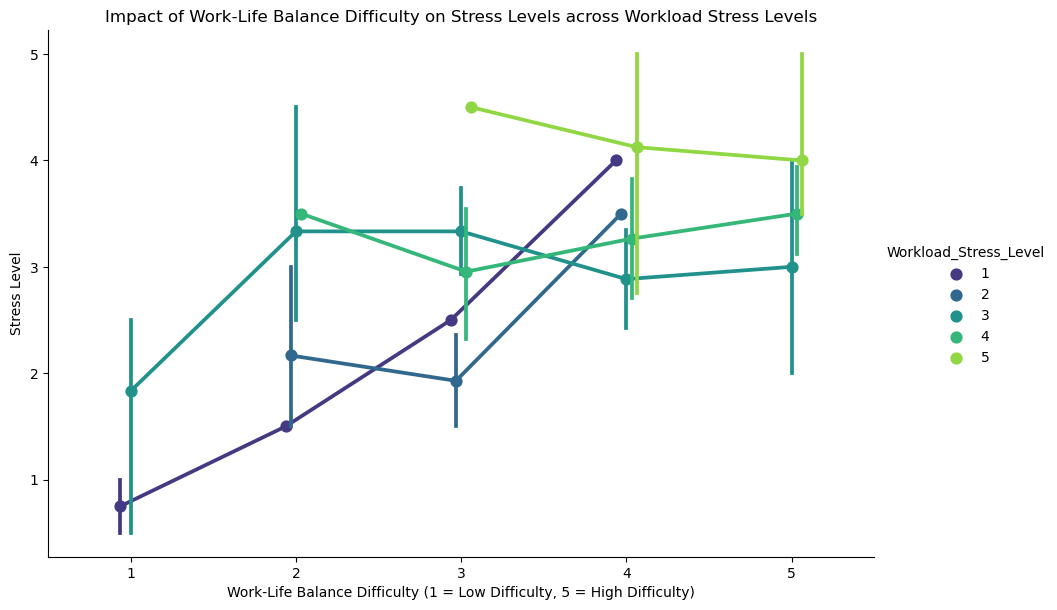

C:\Users\prave\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


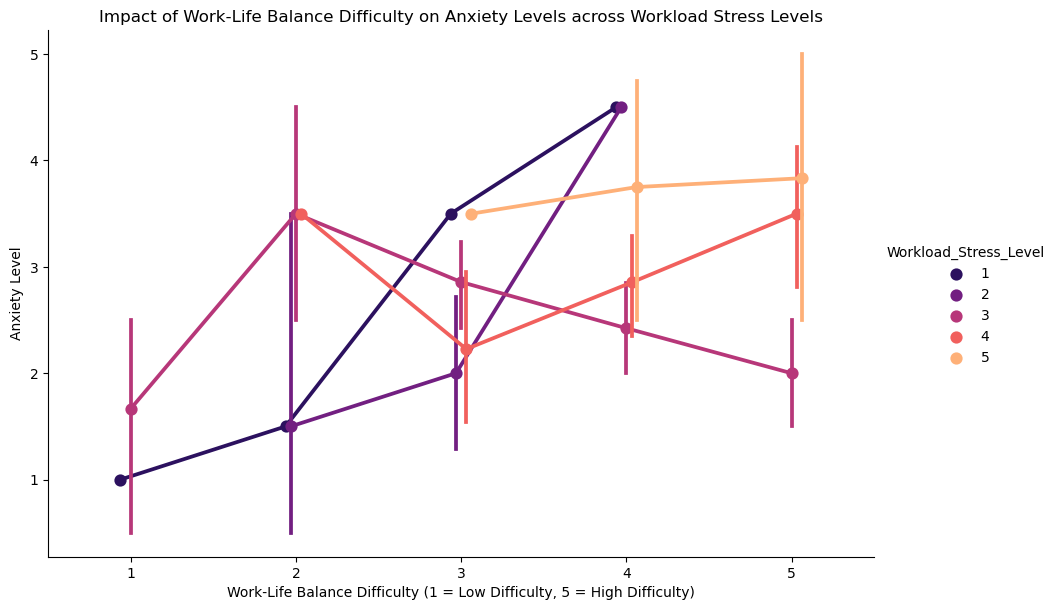

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df and has columns 'Stress_Level', 'Anxiety_Level', 
# 'WorkLife_Balance_Difficulty' and 'Workload_Stress_Level'

# Plot Stress Level vs WorkLife_Balance_Difficulty
sns.catplot(
    data=df,
    x="WorkLife_Balance_Difficulty", 
    y="Stress_Level", 
    hue="Workload_Stress_Level",  # This will add colors based on workload stress levels
    kind="point", 
    palette="viridis",
    dodge=True,
    height=6,
    aspect=1.5
)
plt.title("Impact of Work-Life Balance Difficulty on Stress Levels across Workload Stress Levels")
plt.xlabel("Work-Life Balance Difficulty (1 = Low Difficulty, 5 = High Difficulty)")
plt.ylabel("Stress Level")
plt.show()

# Plot Anxiety Level vs WorkLife_Balance_Difficulty
sns.catplot(
    data=df,
    x="WorkLife_Balance_Difficulty", 
    y="Anxiety_Level", 
    hue="Workload_Stress_Level",  # This will add colors based on workload stress levels
    kind="point", 
    palette="magma",
    dodge=True,
    height=6,
    aspect=1.5
)
plt.title("Impact of Work-Life Balance Difficulty on Anxiety Levels across Workload Stress Levels")
plt.xlabel("Work-Life Balance Difficulty (1 = Low Difficulty, 5 = High Difficulty)")
plt.ylabel("Anxiety Level")
plt.show()


C:\Users\prave\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


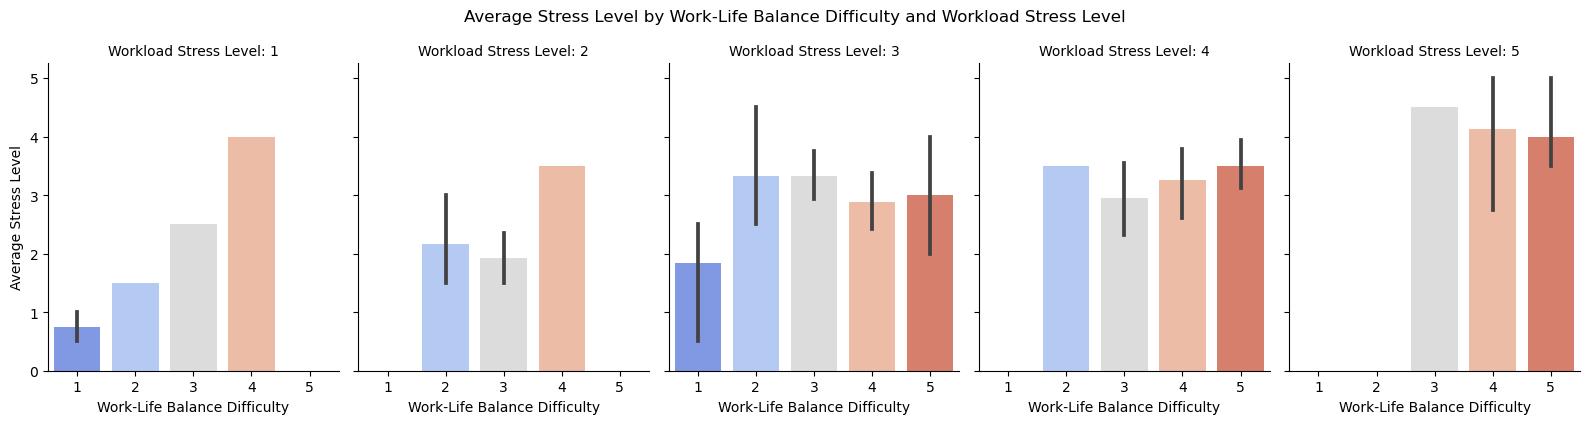

C:\Users\prave\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


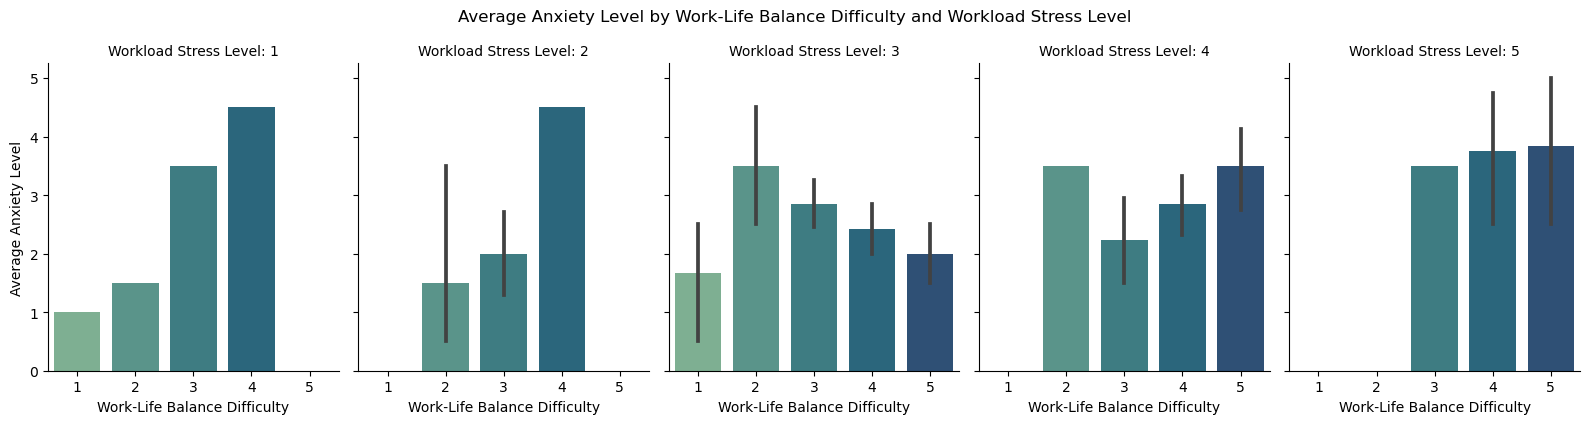

In [16]:
# Faceted Bar Plot for Stress Level
g = sns.catplot(
    data=df,
    x="WorkLife_Balance_Difficulty",
    y="Stress_Level",
    col="Workload_Stress_Level",
    kind="bar",
    palette="coolwarm",
    height=4,
    aspect=0.8
)
g.set_axis_labels("Work-Life Balance Difficulty", "Average Stress Level")
g.set_titles("Workload Stress Level: {col_name}")
plt.suptitle("Average Stress Level by Work-Life Balance Difficulty and Workload Stress Level", y=1.05)
plt.show()

# Faceted Bar Plot for Anxiety Level
g = sns.catplot(
    data=df,
    x="WorkLife_Balance_Difficulty",
    y="Anxiety_Level",
    col="Workload_Stress_Level",
    kind="bar",
    palette="crest",
    height=4,
    aspect=0.8
)
g.set_axis_labels("Work-Life Balance Difficulty", "Average Anxiety Level")
g.set_titles("Workload Stress Level: {col_name}")
plt.suptitle("Average Anxiety Level by Work-Life Balance Difficulty and Workload Stress Level", y=1.05)
plt.show()




### Observations

1. **Stress and Anxiety Increase with Work-Life Balance Difficulty at Low Workload Stress Levels**:
   - For **Workload Stress Levels 1 and 2** (first two columns in each row), both **Average Stress Level** and **Average Anxiety Level** increase as **Work-Life Balance Difficulty** increases.
   - This trend suggests that at lower workload stress levels, difficulties in balancing work and life directly contribute to increased stress and anxiety.

2. **Stress and Anxiety Plateau at Higher Workload Stress Levels**:
   - For **Workload Stress Levels 4 and 5** (fourth and fifth columns), both **Average Stress Level** and **Average Anxiety Level** tend to be high across most **Work-Life Balance Difficulty** levels, but the increase with **Work-Life Balance Difficulty** is less pronounced.
   - This indicates that at higher workload stress levels, individuals experience consistently high stress and anxiety regardless of their work-life balance difficulty.

3. **High Variability in Stress and Anxiety at Moderate Workload Stress Levels**:
   - For **Workload Stress Level 3** (third column), there is significant variability in **Average Stress Level** and **Average Anxiety Level**, with wider error bars.
   - This variability suggests that individuals at a moderate workload stress level experience more varied stress and anxiety levels depending on their work-life balance difficulties, potentially due to individual differences in coping mechanisms or support systems. 

These patterns illustrate how both **workload stress** and **work-life balance difficulty** impact stress and anxiety, with higher workload stress levels generally leading to consistently elevated stress and anxiety regardless of work-life balance.

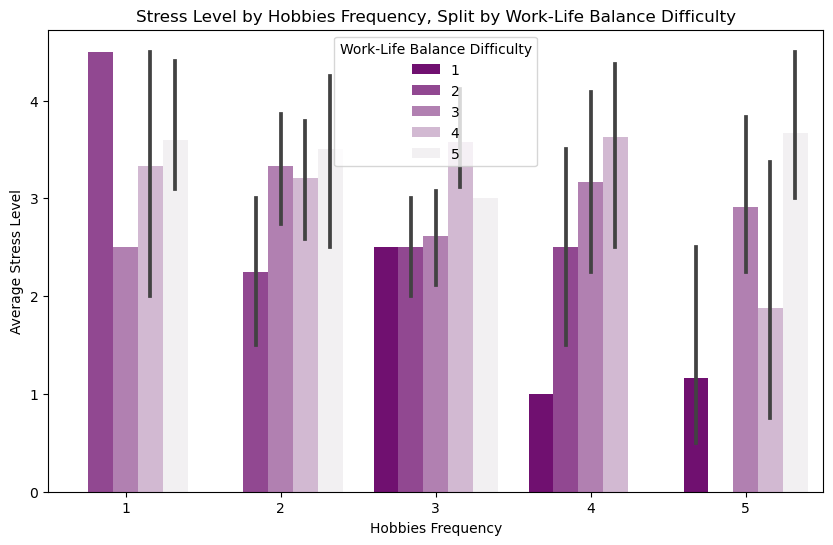

In [17]:
# Using a gradient from a single color (e.g., purple)
custom_palette = sns.light_palette("purple", n_colors=5, reverse=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x="Hobbies_Frequency",
    y="Stress_Level",
    hue="WorkLife_Balance_Difficulty",
    palette=custom_palette
)
plt.title("Stress Level by Hobbies Frequency, Split by Work-Life Balance Difficulty")
plt.xlabel("Hobbies Frequency")
plt.ylabel("Average Stress Level")
plt.legend(title="Work-Life Balance Difficulty")
plt.show()



### Observations

1. **Inverse Relationship Between Hobbies Frequency and Stress Level for Low Work-Life Balance Difficulty**:
   - For individuals with lower work-life balance difficulties (Work-Life Balance Difficulty 1, in the darkest purple), there’s a noticeable drop in stress levels as hobbies frequency increases. 
   - This suggests that people who find it easier to balance work and life might experience lower stress levels with more frequent engagement in hobbies.

2. **Higher Stress Levels Across All Hobbies Frequencies for Higher Work-Life Balance Difficulty**:
   - For those with high work-life balance difficulty (especially Work-Life Balance Difficulty 4 and 5, lighter shades), stress levels remain relatively high across all hobbies frequencies.
   - This indicates that for individuals who struggle more with work-life balance, engaging in hobbies alone may not be sufficient to reduce stress significantly.

3. **Variation in Stress Levels at Moderate Hobbies Frequencies**:
   - At moderate levels of hobbies frequency (2 and 3), there is noticeable variability in stress levels across different work-life balance difficulties, with larger error bars.
   - This suggests that at mid-levels of hobbies engagement, the effect on stress levels might be more inconsistent and potentially influenced by other factors, such as the type or intensity of the hobbies or individual differences in how people cope with stress.

Overall, this plot highlights that while increased hobbies frequency may reduce stress for those with lower work-life balance difficulty, it has less impact on individuals with higher work-life balance difficulty.

In [19]:
df.head()

,Age,Education Level,Anxiety_Level,Stress_Level,Anxiety_Symptoms_Frequency,Overwhelmed_Frequency,Control_Loss_Days,Sleep_Quality,Sleep_Trouble_Frequency,Physical_Activity_Frequency,...,Job Level _Entry-Level,Job Level _Mid-Level,Job Level _Not Applicable,Job Level _Senior-Level,Sleep_Hours_5-6 hours,Sleep_Hours_6-7 hours,Sleep_Hours_7-8 hours,Sleep_Hours_<5 hours,Sleep_Hours_>8 hours,Sleep_Hours
0,2,1,4.5,4.5,3,4,5,4,3,5,...,1,0,0,0,0,1,0,0,0,6-7 hours
1,2,1,5.0,5.0,4,3,3,3,2,5,...,0,0,1,0,1,0,0,0,0,5-6 hours
2,2,2,4.5,3.5,4,4,3,3,3,4,...,1,0,0,0,0,1,0,0,0,6-7 hours
3,2,2,3.5,2.0,4,4,3,3,4,2,...,1,0,0,0,0,1,0,0,0,6-7 hours
4,2,1,4.0,3.5,3,3,4,1,4,4,...,0,0,1,0,0,0,0,1,0,<5 hours


In [20]:
df.columns

Index(['Age', 'Education Level', 'Anxiety_Level', 'Stress_Level',
       'Anxiety_Symptoms_Frequency', 'Overwhelmed_Frequency',
       'Control_Loss_Days', 'Sleep_Quality', 'Sleep_Trouble_Frequency',
       'Physical_Activity_Frequency', 'Physical_Activity_Intensity',
       'Workload_Stress_Level', 'WorkLife_Balance_Difficulty', 'Peer_support',
       'Relaxation_Techniques_Frequency', 'Hobbies_Frequency',
       'Seek_Professional_Help', 'Gender_Man', 'Gender_Woman',
       'Gender_Non Binary', 'Gender_Trans Man', 'Gender_Trans Woman',
       'Gender_Genderfluid', 'Gender_Other', 'Gender_Prefer Not to Say',
       'Occupation_Job Professional', 'Occupation_Other',
       'Occupation_Self - Employed', 'Occupation_Student',
       'Occupation_Unemployed', 'Job Level _Entry-Level',
       'Job Level _Mid-Level', 'Job Level _Not Applicable',
       'Job Level _Senior-Level', 'Sleep_Hours_5-6 hours',
       'Sleep_Hours_6-7 hours', 'Sleep_Hours_7-8 hours',
       'Sleep_Hours_<5 hours', '

In [21]:
# Assuming df is your DataFrame
# Create a dictionary to map each one-hot encoded column to the occupation name
occupation_columns = {
    'Occupation_Job Professional': 'Job Professional',
    'Occupation_Other': 'Other',
    'Occupation_Self - Employed': 'Self-Employed',
    'Occupation_Student': 'Student',
    'Occupation_Unemployed': 'Unemployed'
}

# Use df.melt() to reshape the DataFrame and filter out rows where the value is 1 for each occupation
df_melted = df[list(occupation_columns.keys())].reset_index().melt(id_vars='index', var_name='Occupation_Type', value_name='Present')
df_melted = df_melted[df_melted['Present'] == 1].drop(columns='Present')

# Map the column names to occupation names and merge back to original DataFrame
df_melted['Occupation'] = df_melted['Occupation_Type'].map(occupation_columns)
df = df.merge(df_melted[['index', 'Occupation']], left_index=True, right_on='index').drop(columns=['index'] + list(occupation_columns.keys()))

# Now df should have a single 'Occupation' column with values like 'Student', 'Unemployed', etc.


In [22]:
df


,Age,Education Level,Anxiety_Level,Stress_Level,Anxiety_Symptoms_Frequency,Overwhelmed_Frequency,Control_Loss_Days,Sleep_Quality,Sleep_Trouble_Frequency,Physical_Activity_Frequency,...,Job Level _Mid-Level,Job Level _Not Applicable,Job Level _Senior-Level,Sleep_Hours_5-6 hours,Sleep_Hours_6-7 hours,Sleep_Hours_7-8 hours,Sleep_Hours_<5 hours,Sleep_Hours_>8 hours,Sleep_Hours,Occupation
0,2,1,4.5,4.5,3,4,5,4,3,5,...,0,0,0,0,1,0,0,0,6-7 hours,Job Professional
310,2,1,5.0,5.0,4,3,3,3,2,5,...,0,1,0,1,0,0,0,0,5-6 hours,Student
2,2,2,4.5,3.5,4,4,3,3,3,4,...,0,0,0,0,1,0,0,0,6-7 hours,Job Professional
3,2,2,3.5,2.0,4,4,3,3,4,2,...,0,0,0,0,1,0,0,0,6-7 hours,Job Professional
313,2,1,4.0,3.5,3,3,4,1,4,4,...,0,1,0,0,0,0,1,0,<5 hours,Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,2,1,3.5,4.0,4,3,1,4,3,3,...,0,1,0,0,0,1,0,0,7-8 hours,Student
99,2,1,3.5,2.5,5,5,2,3,4,3,...,0,0,0,1,0,0,0,0,5-6 hours,Job Professional
100,3,2,4.0,5.0,3,4,2,3,4,2,...,0,0,0,0,0,1,0,0,7-8 hours,Job Professional
410,2,2,3.5,3.5,4,4,1,3,4,4,...,0,1,0,0,1,0,0,0,6-7 hours,Student


C:\Users\prave\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


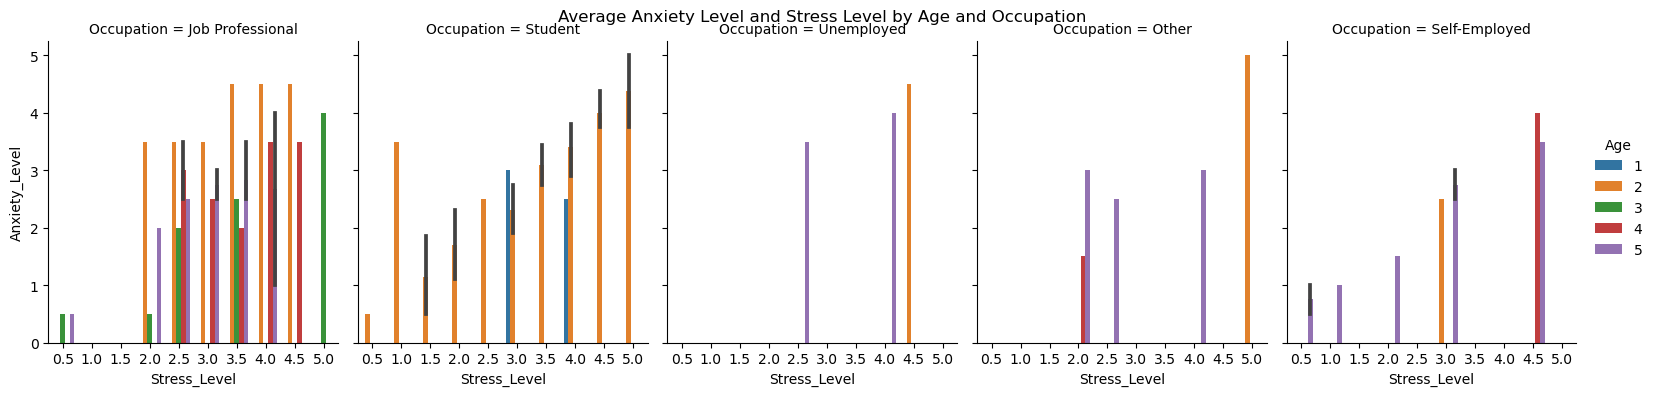

In [23]:
# Bar plot with Seaborn catplot
sns.catplot(
    data=df,
    x="Stress_Level", 
    y="Anxiety_Level", 
    hue="Age", 
    col="Occupation", 
    kind="bar", 
    height=4, 
    aspect=0.8
)

plt.subplots_adjust(top=0.9)
plt.suptitle("Average Anxiety Level and Stress Level by Age and Occupation")
plt.show()


C:\Users\prave\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


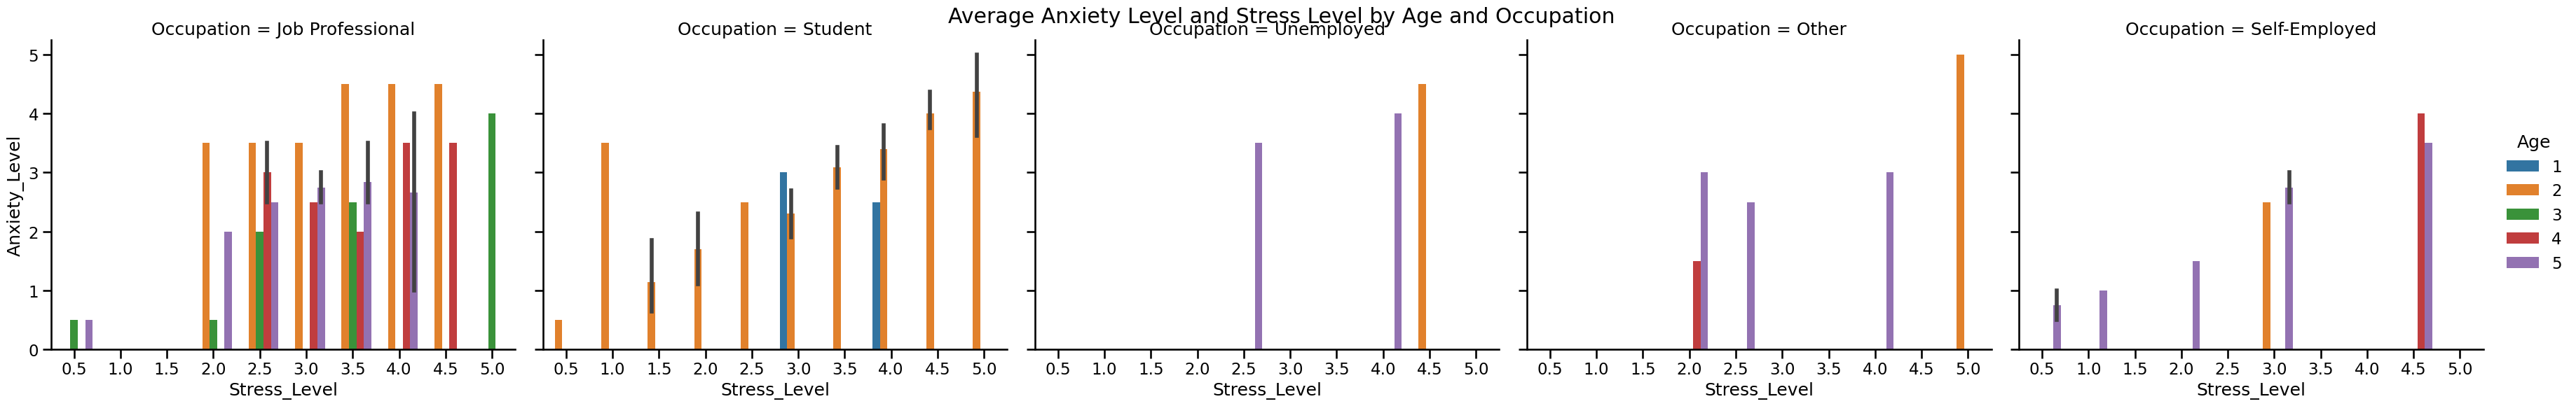

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust height and aspect for larger plot size
sns.set_context("talk")  # Increase font size for better readability
plot = sns.catplot(
    data=df,
    x="Stress_Level", 
    y="Anxiety_Level", 
    hue="Age", 
    col="Occupation", 
    kind="bar", 
    height=6,    # Increase height for larger plot
    aspect=1.2   # Increase aspect ratio to make plots wider
)

# Add title and adjust layout
plot.fig.subplots_adjust(top=0.9)
plot.fig.suptitle("Average Anxiety Level and Stress Level by Age and Occupation")

# Add legend title for hue
plot._legend.set_title("Age")

# Show the plot
plt.show()



1. **High Anxiety and Stress Levels Among Students**:
   - The "Student" occupation category shows consistently high anxiety levels across different stress levels, with many students falling into higher stress (4-5) and higher anxiety levels.
   - This could indicate that students might be under significant pressure, possibly due to academic demands or other stressors related to their studies.

2. **Variation in Anxiety Levels for Job Professionals**:
   - For individuals in the "Job Professional" category, anxiety levels appear to vary more widely across different stress levels. There is a notable mix of low and high anxiety levels, even at higher stress levels (4-5).
   - This suggests that factors other than just stress, such as coping mechanisms or work-life balance, might influence anxiety levels in job professionals.

3. **Higher Anxiety Levels Among Younger Self-Employed Individuals**:
   - In the "Self-Employed" category, the younger age group (represented by colors for Age Level 2) tends to have higher anxiety levels, especially at higher stress levels (4-5).
   - This observation could imply that younger self-employed individuals might experience more anxiety possibly due to the uncertainties and challenges of self-employment.

Overall, these plots highlight how the relationship between stress and anxiety can vary by occupation and age, with students and younger self-employed individuals generally showing higher levels of anxiety.

In [26]:
gender_columns = [
    'Gender_Man', 'Gender_Woman', 'Gender_Non Binary', 'Gender_Trans Man', 
    'Gender_Trans Woman', 'Gender_Genderfluid', 'Gender_Other', 'Gender_Prefer Not to Say'
]

# Melt the gender columns to create a long-form DataFrame
df_long = df.melt(id_vars=['Stress_Level', 'Occupation'], 
                  value_vars=gender_columns, 
                  var_name='Gender', 
                  value_name='IsPresent')

# Filter only rows where the gender is present (IsPresent == 1)
df_long = df_long[df_long['IsPresent'] == 1].drop(columns=['IsPresent'])

# Remove the 'Gender_' prefix in the Gender column to make it cleaner
df_long['Gender'] = df_long['Gender'].str.replace('Gender_', '')

In [27]:
df

,Age,Education Level,Anxiety_Level,Stress_Level,Anxiety_Symptoms_Frequency,Overwhelmed_Frequency,Control_Loss_Days,Sleep_Quality,Sleep_Trouble_Frequency,Physical_Activity_Frequency,...,Job Level _Mid-Level,Job Level _Not Applicable,Job Level _Senior-Level,Sleep_Hours_5-6 hours,Sleep_Hours_6-7 hours,Sleep_Hours_7-8 hours,Sleep_Hours_<5 hours,Sleep_Hours_>8 hours,Sleep_Hours,Occupation
0,2,1,4.5,4.5,3,4,5,4,3,5,...,0,0,0,0,1,0,0,0,6-7 hours,Job Professional
310,2,1,5.0,5.0,4,3,3,3,2,5,...,0,1,0,1,0,0,0,0,5-6 hours,Student
2,2,2,4.5,3.5,4,4,3,3,3,4,...,0,0,0,0,1,0,0,0,6-7 hours,Job Professional
3,2,2,3.5,2.0,4,4,3,3,4,2,...,0,0,0,0,1,0,0,0,6-7 hours,Job Professional
313,2,1,4.0,3.5,3,3,4,1,4,4,...,0,1,0,0,0,0,1,0,<5 hours,Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,2,1,3.5,4.0,4,3,1,4,3,3,...,0,1,0,0,0,1,0,0,7-8 hours,Student
99,2,1,3.5,2.5,5,5,2,3,4,3,...,0,0,0,1,0,0,0,0,5-6 hours,Job Professional
100,3,2,4.0,5.0,3,4,2,3,4,2,...,0,0,0,0,0,1,0,0,7-8 hours,Job Professional
410,2,2,3.5,3.5,4,4,1,3,4,4,...,0,1,0,0,1,0,0,0,6-7 hours,Student


In [28]:
df_long

,Stress_Level,Occupation,Gender
0,4.5,Job Professional,Man
1,5.0,Student,Man
3,2.0,Job Professional,Man
4,3.5,Student,Man
5,5.0,Student,Man
...,...,...,...
203,5.0,Job Professional,Woman
204,3.5,Student,Woman
205,3.0,Self-Employed,Woman
300,3.5,Student,Non Binary


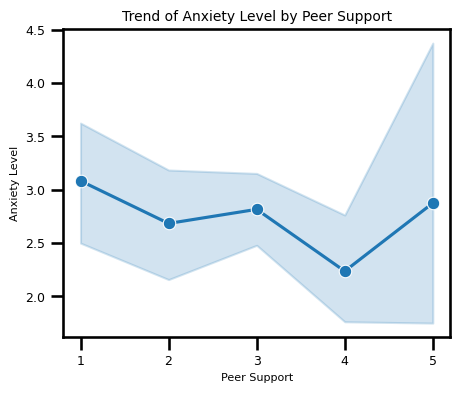

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce figure size for more compact display
plt.figure(figsize=(5, 4))
sns.lineplot(data=df, x="Peer_support", y="Anxiety_Level", marker="o")  # Changed y to Anxiety_Level

# Reduce font sizes for title and labels
plt.title("Trend of Anxiety Level by Peer Support", fontsize=10)  # Updated title
plt.xlabel("Peer Support", fontsize=8)
plt.ylabel("Anxiety Level", fontsize=8)  # Updated ylabel

# Adjust tick label sizes for consistency
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.show()



### Graph 2: Trend of Anxiety Level by Peer Support
1. **Initial Drop in Anxiety with Higher Peer Support**: Anxiety levels start higher but show a decrease as peer support increases, suggesting that having support helps in reducing anxiety to some extent.
2. **Plateau and Dip**: After an initial decrease, the trend levels out and dips at the fourth point, indicating a potential threshold where peer support is maximally effective in reducing anxiety.
3. **Rise at Maximum Peer Support**: A sharp increase at the highest level of peer support could indicate that excessive reliance on or expectation from peers might contribute to rising anxiety levels, possibly due to social pressures or unmet expectations.


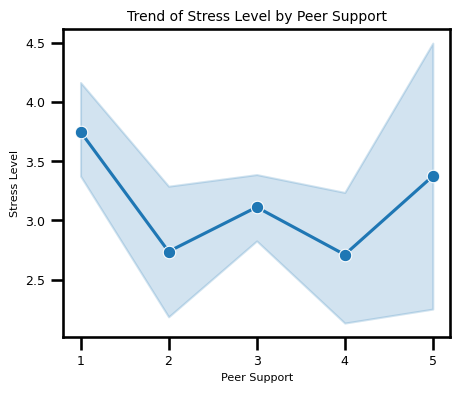

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce figure size for more compact display
plt.figure(figsize=(5, 4))
sns.lineplot(data=df, x="Peer_support", y="Stress_Level", marker="o")

# Reduce font sizes for title and labels
plt.title("Trend of Stress Level by Peer Support", fontsize=10)
plt.xlabel("Peer Support", fontsize=8)
plt.ylabel("Stress Level", fontsize=8)

# Adjust tick label sizes for consistency
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.show()



### Graph 1: Trend of Stress Level by Peer Support
1. **Negative Correlation at Low Peer Support**: Initially, higher peer support is associated with lower stress levels, suggesting that increased peer support may contribute to stress reduction up to a certain point.
2. **U-shaped Pattern**: The trend shows a U-shape where stress levels decrease up to a certain midpoint, then rise again, indicating that while initial peer support helps reduce stress, beyond a certain level, stress may increase due to other factors.
3. **Moderate Increase at Higher Support Levels**: The increase in stress levels towards the end may imply that peer support alone is not sufficient to maintain lower stress levels as other variables may come into play.

These trends suggest that while peer support can initially help reduce both stress and anxiety, its effectiveness may vary depending on the level of support and other contributing factors.

C:\Users\prave\AppData\Local\Temp\ipykernel_27600\1605887628.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Relaxation_Techniques_Frequency", y="Stress_Level", ci=None)
C:\Users\prave\AppData\Local\Temp\ipykernel_27600\1605887628.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Relaxation_Techniques_Frequency", y="Anxiety_Level", ci=None)


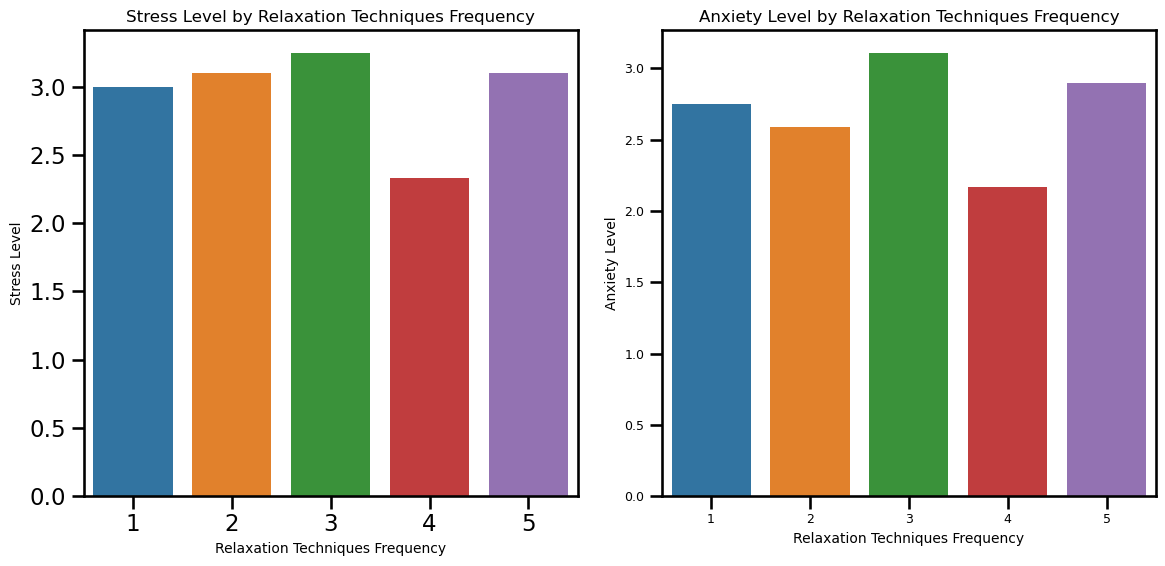

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size for compact display
plt.figure(figsize=(12, 6))

# Create a bar plot for Stress Level
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.barplot(data=df, x="Relaxation_Techniques_Frequency", y="Stress_Level", ci=None)
plt.title("Stress Level by Relaxation Techniques Frequency", fontsize=12)
plt.xlabel("Relaxation Techniques Frequency", fontsize=10)
plt.ylabel("Stress Level", fontsize=10)

# Create a bar plot for Anxiety Level
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(data=df, x="Relaxation_Techniques_Frequency", y="Anxiety_Level", ci=None)
plt.title("Anxiety Level by Relaxation Techniques Frequency", fontsize=12)
plt.xlabel("Relaxation Techniques Frequency", fontsize=10)
plt.ylabel("Anxiety Level", fontsize=10)

# Adjust tick label sizes for consistency
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()





1. **Decreased Stress and Anxiety with Moderate Relaxation Frequency**: Both plots show a decrease in `Stress Level` and `Anxiety Level` at a `Relaxation Techniques Frequency` of 4. This suggests that engaging in relaxation techniques moderately (frequency 4) could be effective in lowering stress and anxiety levels.

2. **Higher Stress and Anxiety at Intermediate Levels of Frequency**: For `Relaxation Techniques Frequency` values of 2 and 3, both `Stress Level` and `Anxiety Level` tend to be higher compared to lower or higher frequencies. This could indicate that inconsistent or irregular relaxation practices might not provide the same stress-reducing benefits.

3. **Increased Levels at Both Extremes of Frequency**: At both very low (frequency 1) and very high (frequency 5) levels of `Relaxation Techniques Frequency`, there is an increase in both `Stress Level` and `Anxiety Level`. This might suggest that either insufficient relaxation (frequency 1) or excessive attempts (frequency 5) could lead to higher stress and anxiety, potentially due to unrealistic expectations or overexertion.

These observations suggest that maintaining a balanced and consistent frequency of relaxation techniques may be more beneficial than either extreme or irregular practices.

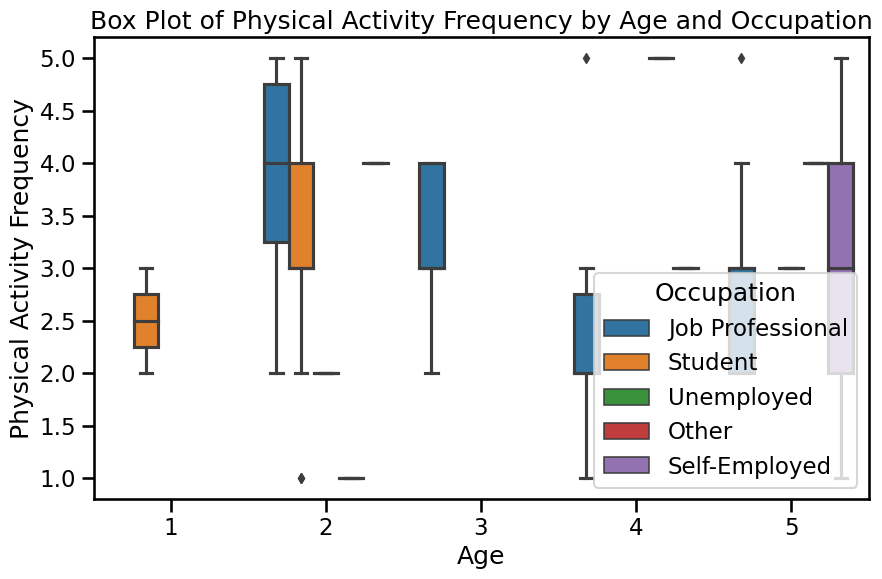

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Physical_Activity_Frequency', hue='Occupation', data=df)
plt.title('Box Plot of Physical Activity Frequency by Age and Occupation')
plt.xlabel('Age')
plt.ylabel('Physical Activity Frequency')
plt.legend(title='Occupation')
plt.show()

1. **Higher Physical Activity Frequency Among Younger Age Groups**: Age groups 1 and 2, which likely represent younger individuals, show higher levels of `Physical Activity Frequency`. This could indicate that younger individuals tend to be more physically active than older ones.
- Age group 1 <18, age group 2 18-24, age group 3 25-34 , age group 4 35-44, age group 5 45+

2. **Occupation-Based Variation**: There is a noticeable difference in `Physical Activity Frequency` across occupations. For example, students (orange) show relatively high physical activity frequency in the younger age groups, while job professionals (blue) maintain moderate to high physical activity across various age groups. Self-employed individuals (purple) in age group 5 show a wider spread in activity frequency, which could indicate varied lifestyle patterns among self-employed individuals.

3. **Outliers and Low Physical Activity in Older Age Groups**: Age groups 4 and 5 have a wider spread and lower medians for `Physical Activity Frequency`, with some outliers indicating minimal activity. This trend suggests that as age increases, the frequency of physical activity generally declines, with more variation among individuals in these older age groups. 

These observations could help in understanding the relationship between age, occupation, and physical activity, which may assist in designing tailored fitness interventions for different demographics.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 308
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              103 non-null    int64  
 1   Education Level                  103 non-null    int64  
 2   Anxiety_Level                    103 non-null    float64
 3   Stress_Level                     103 non-null    float64
 4   Anxiety_Symptoms_Frequency       103 non-null    int64  
 5   Overwhelmed_Frequency            103 non-null    int64  
 6   Control_Loss_Days                103 non-null    int64  
 7   Sleep_Quality                    103 non-null    int64  
 8   Sleep_Trouble_Frequency          103 non-null    int64  
 9   Physical_Activity_Frequency      103 non-null    int64  
 10  Physical_Activity_Intensity      103 non-null    int64  
 11  Workload_Stress_Level            103 non-null    int64  
 12  WorkLife_Balance_Diffi

C:\Users\prave\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\prave\AppData\Local\Temp\ipykernel_27600\2393515256.py:37: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


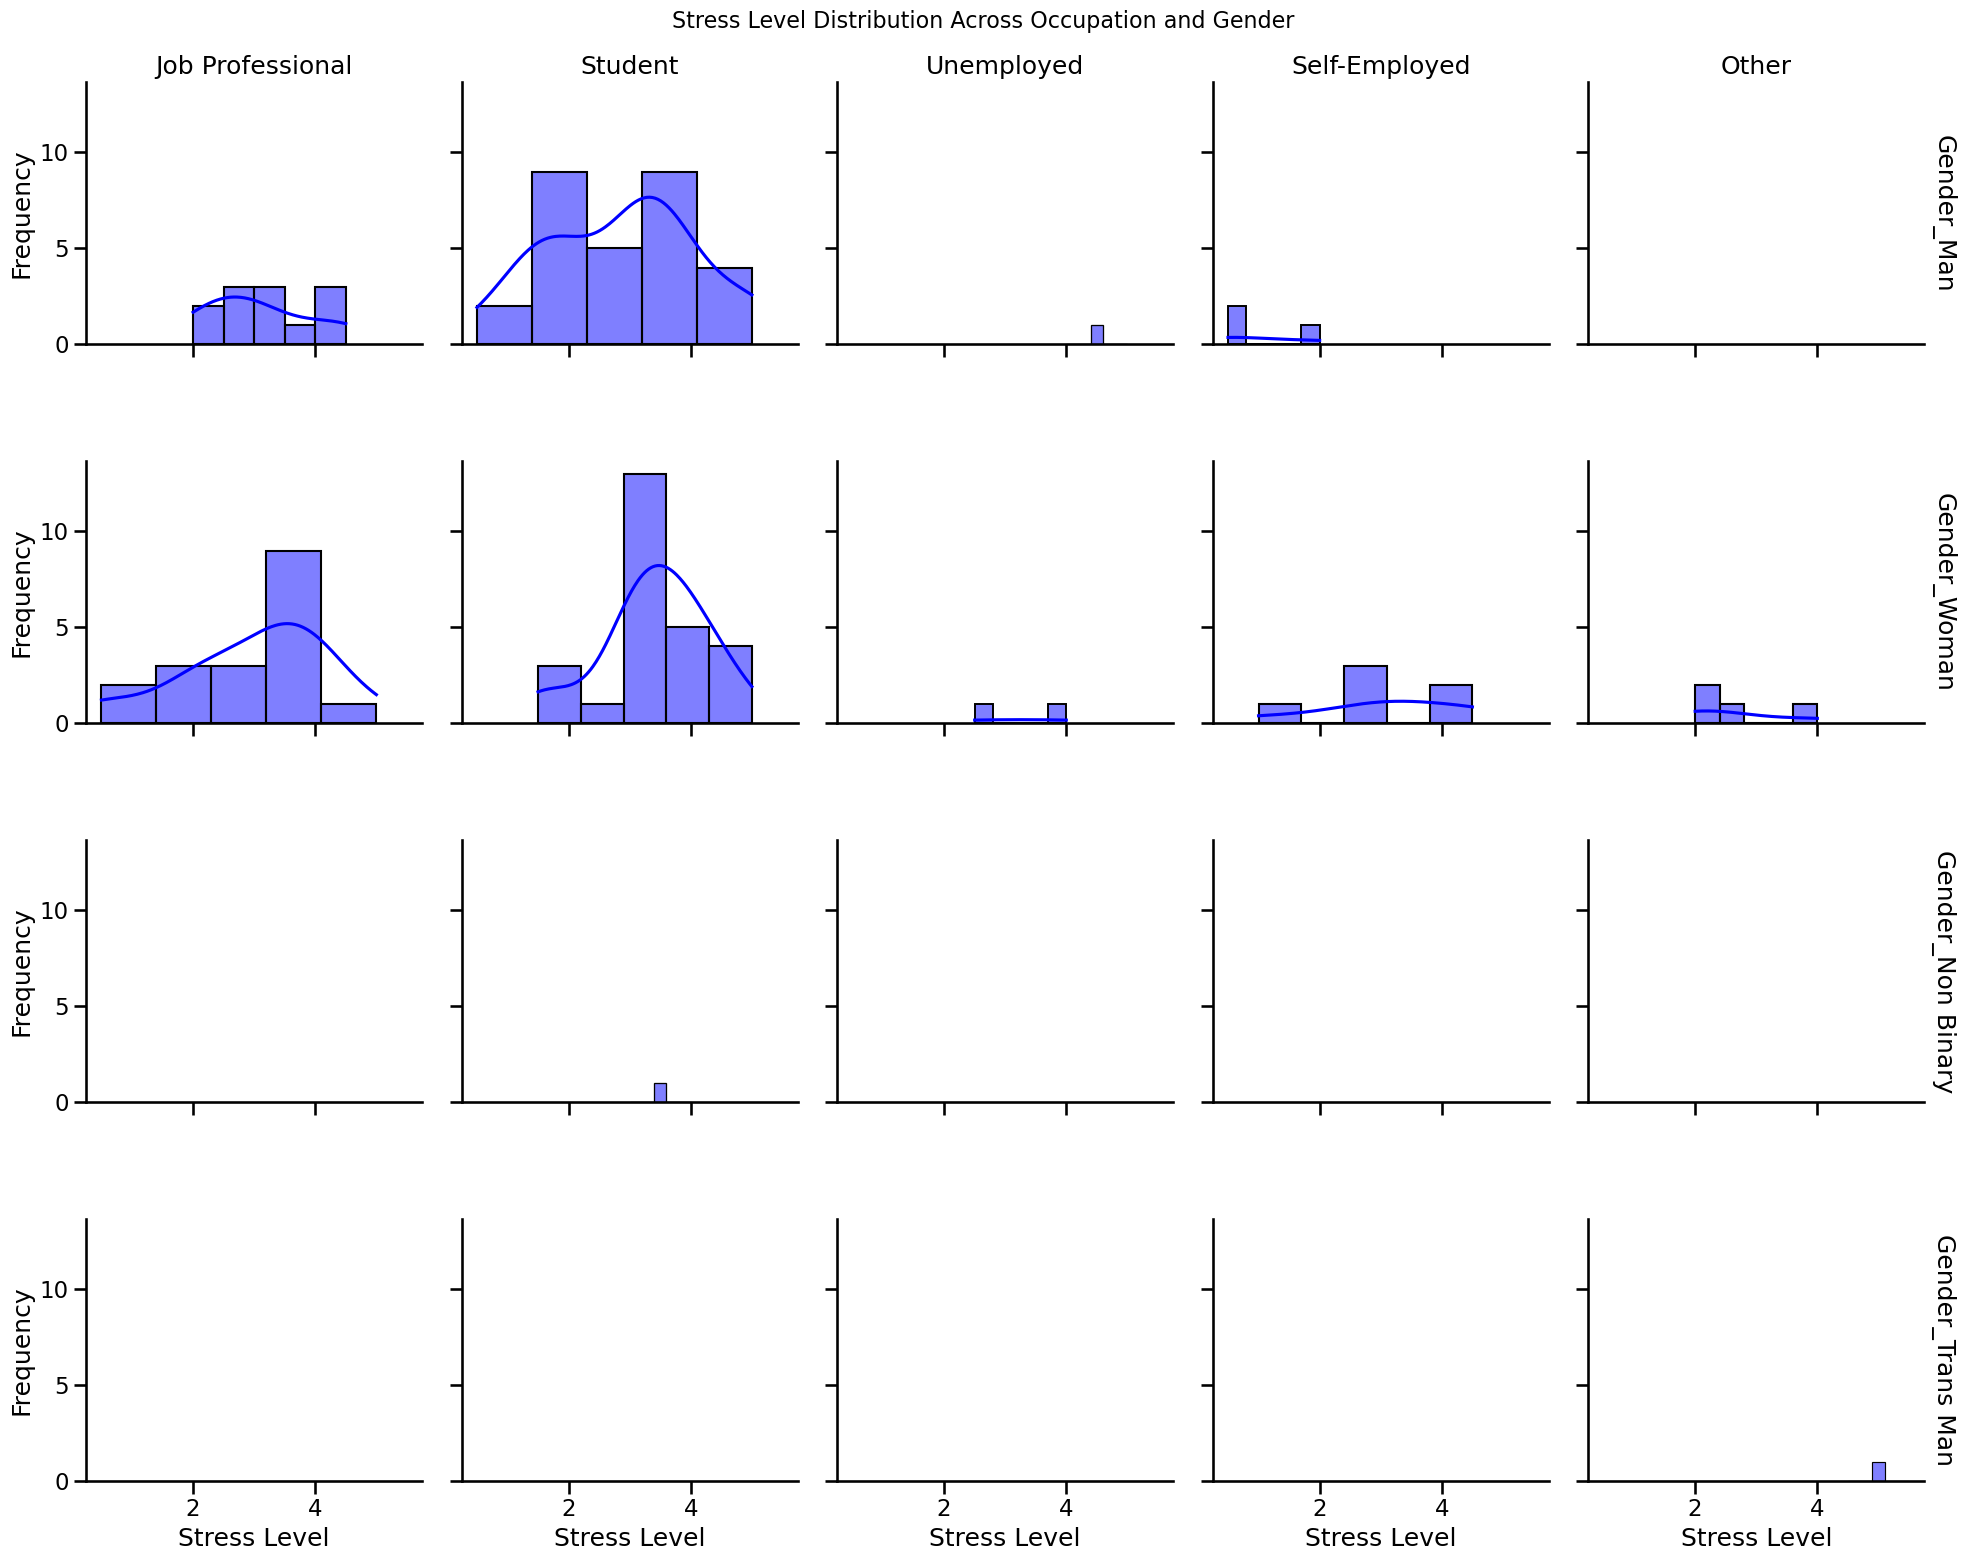

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
# df = pd.read_csv('your_dataset.csv')  # Uncomment and replace with your actual data loading

# Step 1: Create a new DataFrame that combines one-hot encoded gender into a single column
gender_columns = [
    'Gender_Man', 'Gender_Woman', 'Gender_Non Binary', 
    'Gender_Trans Man', 'Gender_Trans Woman', 
    'Gender_Genderfluid', 'Gender_Other', 
    'Gender_Prefer Not to Say'
]

# Melting the DataFrame to have a long format
df_melted = df.melt(id_vars=['Stress_Level', 'Occupation'], 
                    value_vars=gender_columns,
                    var_name='Gender_Type', 
                    value_name='Is_Gender')

# Filter to keep only rows where Is_Gender is 1 (indicating presence of that gender)
df_melted = df_melted[df_melted['Is_Gender'] == 1]

# Step 2: Set up the FacetGrid
g = sns.FacetGrid(df_melted, col='Occupation', row='Gender_Type', margin_titles=True, height=4)

# Step 3: Map a histogram to the grid
g.map(sns.histplot, 'Stress_Level', kde=True, bins=5, color='blue', stat='count')

# Step 4: Add titles and labels
g.fig.suptitle('Stress Level Distribution Across Occupation and Gender', fontsize=16)
g.set_axis_labels('Stress Level', 'Frequency')
g.set_titles(col_template='{col_name}', row_template='{row_name}')

# Step 5: Show the plot
plt.tight_layout()
plt.show()



1. **Different Occupation and Gender Patterns**:
   - The stress level distribution varies significantly across occupation types and gender. For example, "Job Professionals" and "Students" show the highest distribution peaks compared to other occupations, especially for "Gender: Man" and "Gender: Woman."
   
2. **Lower Stress Levels Among Non-Binary and Trans Man Genders**:
   - For "Gender: Non Binary" and "Gender: Trans Man," the frequency of stress levels is generally low across all occupation types. This could indicate fewer respondents in these categories or lower reported stress levels within these groups.

3. **Peak Stress Levels in Student Category**:
   - "Students" exhibit noticeable peaks in stress levels, particularly for "Gender: Man" and "Gender: Woman." This suggests that students may experience higher or more concentrated stress levels compared to other occupations, potentially due to academic pressures.

C:\Users\prave\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prave\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


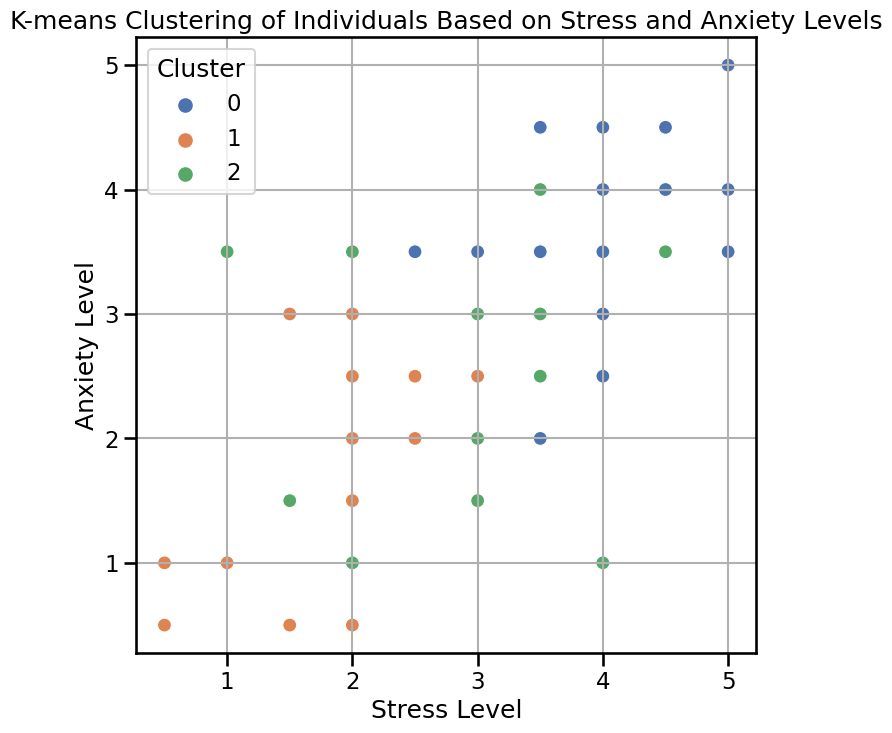

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load your dataset into a DataFrame
# df = pd.read_csv('your_dataset.csv')  # Uncomment and replace with your actual data loading

# Step 1: Select relevant features for clustering
features = [
    'Stress_Level', 'Anxiety_Level', 'Sleep_Quality', 
    'Physical_Activity_Frequency', 'Peer_support', 'Hobbies_Frequency'
]

# Step 2: Normalize the data
X = df[features].dropna()  # Remove any rows with NaN values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Run K-means clustering
k = 3  # You can choose the number of clusters; here we use 3 as an example
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Step 4: Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Step 5: Visualize the clusters in a scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='Stress_Level', y='Anxiety_Level', hue='Cluster', palette='deep', s=100)
plt.title('K-means Clustering of Individuals Based on Stress and Anxiety Levels')
plt.xlabel('Stress Level')
plt.ylabel('Anxiety Level')
plt.legend(title='Cluster')
plt.grid()
plt.show()



1. **Cluster 0 (Blue - High Stress and Anxiety):** This cluster primarily includes individuals with high levels of both stress and anxiety (around 4–5 on both scales). These individuals likely have lower peer support, lower sleep quality, and less frequent physical activity or engagement in hobbies—all factors that might contribute to their high stress and anxiety levels.

2. **Cluster 1 (Orange - Low Stress and Anxiety):** This cluster groups individuals who report low levels of stress and anxiety (around 1–2). People in this cluster likely have higher peer support, better sleep quality, frequent physical activity, and regular engagement in hobbies, which may contribute to their lower stress and anxiety.

3. **Cluster 2 (Green - Moderate Stress and Anxiety):** Cluster 2 is spread between low and high stress/anxiety levels, indicating mixed or moderate levels of these factors. This cluster might represent individuals with a balance—some positive and some negative lifestyle factors. For example, they might have moderate peer support, sleep quality, and physical activity frequency, which leads to moderate stress and anxiety levels. 

These observations help highlight how different clusters may represent individuals with varying levels of lifestyle support factors that impact stress and anxiety.

In [71]:
df.to_csv('survey_new.csv', index=False)


In [72]:
from IPython.display import FileLink
FileLink(r'survey_new.csv')

C:\Users\prave\survey_new.csv

In [73]:
import pandas as pd

# Assuming df is your DataFrame
df.to_excel('survey_new.xlsx', index=False)


In [74]:
from IPython.display import FileLink
FileLink('survey_new.xlsx')


C:\Users\prave\survey_new.xlsx

In [75]:
df.describe()

,Age,Education Level,Anxiety_Level,Stress_Level,Anxiety_Symptoms_Frequency,Overwhelmed_Frequency,Control_Loss_Days,Sleep_Quality,Sleep_Trouble_Frequency,Physical_Activity_Frequency,...,Job Level _Entry-Level,Job Level _Mid-Level,Job Level _Not Applicable,Job Level _Senior-Level,Sleep_Hours_5-6 hours,Sleep_Hours_6-7 hours,Sleep_Hours_7-8 hours,Sleep_Hours_<5 hours,Sleep_Hours_>8 hours,Cluster
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,2.912621,1.640777,2.718447,3.053398,3.194175,3.495146,2.407767,3.262136,2.737864,3.223301,...,0.106796,0.106796,0.611650,0.174757,0.388350,0.339806,0.194175,0.067961,0.009709,1.009709
std,1.321814,0.521205,1.175047,1.139557,0.897253,0.916876,1.403336,0.917810,1.009379,1.101977,...,0.310364,0.310364,0.489758,0.381616,0.489758,0.475959,0.397498,0.252910,0.098533,0.857437
min,1.000000,1.000000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,3.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,2.500000,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,2.000000,3.500000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [76]:
df.head(30)

,Age,Education Level,Anxiety_Level,Stress_Level,Anxiety_Symptoms_Frequency,Overwhelmed_Frequency,Control_Loss_Days,Sleep_Quality,Sleep_Trouble_Frequency,Physical_Activity_Frequency,...,Job Level _Not Applicable,Job Level _Senior-Level,Sleep_Hours_5-6 hours,Sleep_Hours_6-7 hours,Sleep_Hours_7-8 hours,Sleep_Hours_<5 hours,Sleep_Hours_>8 hours,Sleep_Hours,Occupation,Cluster
0,2,1,4.5,4.5,3,4,5,4,3,5,...,0,0,0,1,0,0,0,6-7 hours,Job Professional,0
310,2,1,5.0,5.0,4,3,3,3,2,5,...,1,0,1,0,0,0,0,5-6 hours,Student,0
2,2,2,4.5,3.5,4,4,3,3,3,4,...,0,0,0,1,0,0,0,6-7 hours,Job Professional,0
3,2,2,3.5,2.0,4,4,3,3,4,2,...,0,0,0,1,0,0,0,6-7 hours,Job Professional,2
313,2,1,4.0,3.5,3,3,4,1,4,4,...,1,0,0,0,0,1,0,<5 hours,Student,2
314,2,2,4.0,5.0,4,3,2,3,3,4,...,1,0,1,0,0,0,0,5-6 hours,Student,0
315,2,1,2.0,3.5,2,3,1,3,2,2,...,1,0,0,1,0,0,0,6-7 hours,Student,2
316,2,2,2.5,3.5,3,4,2,3,2,4,...,1,0,1,0,0,0,0,5-6 hours,Student,2
317,2,2,3.5,3.0,3,3,5,3,2,2,...,1,0,0,1,0,0,0,6-7 hours,Student,2
318,2,2,2.5,3.5,2,4,4,3,1,3,...,1,0,0,1,0,0,0,6-7 hours,Student,0


In [80]:
#one hot encoding occupation
# One-hot encode the 'Occupation' column
occupation_encoded = pd.get_dummies(df['Occupation'], prefix='Occupation')

# Concatenate the new columns with the original dataframe and drop the original 'Occupation' column
df = pd.concat([df, occupation_encoded], axis=1)
df.drop('Occupation', axis=1, inplace=True)


In [81]:
df.head()

,Age,Education Level,Anxiety_Level,Stress_Level,Anxiety_Symptoms_Frequency,Overwhelmed_Frequency,Control_Loss_Days,Sleep_Quality,Sleep_Trouble_Frequency,Physical_Activity_Frequency,...,Sleep_Hours_7-8 hours,Sleep_Hours_<5 hours,Sleep_Hours_>8 hours,Sleep_Hours,Cluster,Occupation_Job Professional,Occupation_Other,Occupation_Self-Employed,Occupation_Student,Occupation_Unemployed
0,2,1,4.5,4.5,3,4,5,4,3,5,...,0,0,0,6-7 hours,0,1,0,0,0,0
310,2,1,5.0,5.0,4,3,3,3,2,5,...,0,0,0,5-6 hours,0,0,0,0,1,0
2,2,2,4.5,3.5,4,4,3,3,3,4,...,0,0,0,6-7 hours,0,1,0,0,0,0
3,2,2,3.5,2.0,4,4,3,3,4,2,...,0,0,0,6-7 hours,2,1,0,0,0,0
313,2,1,4.0,3.5,3,3,4,1,4,4,...,0,1,0,<5 hours,2,0,0,0,1,0


In [83]:
df.drop('Sleep_Hours', axis=1, inplace=True)


In [84]:
df.head()

,Age,Education Level,Anxiety_Level,Stress_Level,Anxiety_Symptoms_Frequency,Overwhelmed_Frequency,Control_Loss_Days,Sleep_Quality,Sleep_Trouble_Frequency,Physical_Activity_Frequency,...,Sleep_Hours_6-7 hours,Sleep_Hours_7-8 hours,Sleep_Hours_<5 hours,Sleep_Hours_>8 hours,Cluster,Occupation_Job Professional,Occupation_Other,Occupation_Self-Employed,Occupation_Student,Occupation_Unemployed
0,2,1,4.5,4.5,3,4,5,4,3,5,...,1,0,0,0,0,1,0,0,0,0
310,2,1,5.0,5.0,4,3,3,3,2,5,...,0,0,0,0,0,0,0,0,1,0
2,2,2,4.5,3.5,4,4,3,3,3,4,...,1,0,0,0,0,1,0,0,0,0
3,2,2,3.5,2.0,4,4,3,3,4,2,...,1,0,0,0,2,1,0,0,0,0
313,2,1,4.0,3.5,3,3,4,1,4,4,...,0,0,1,0,2,0,0,0,1,0


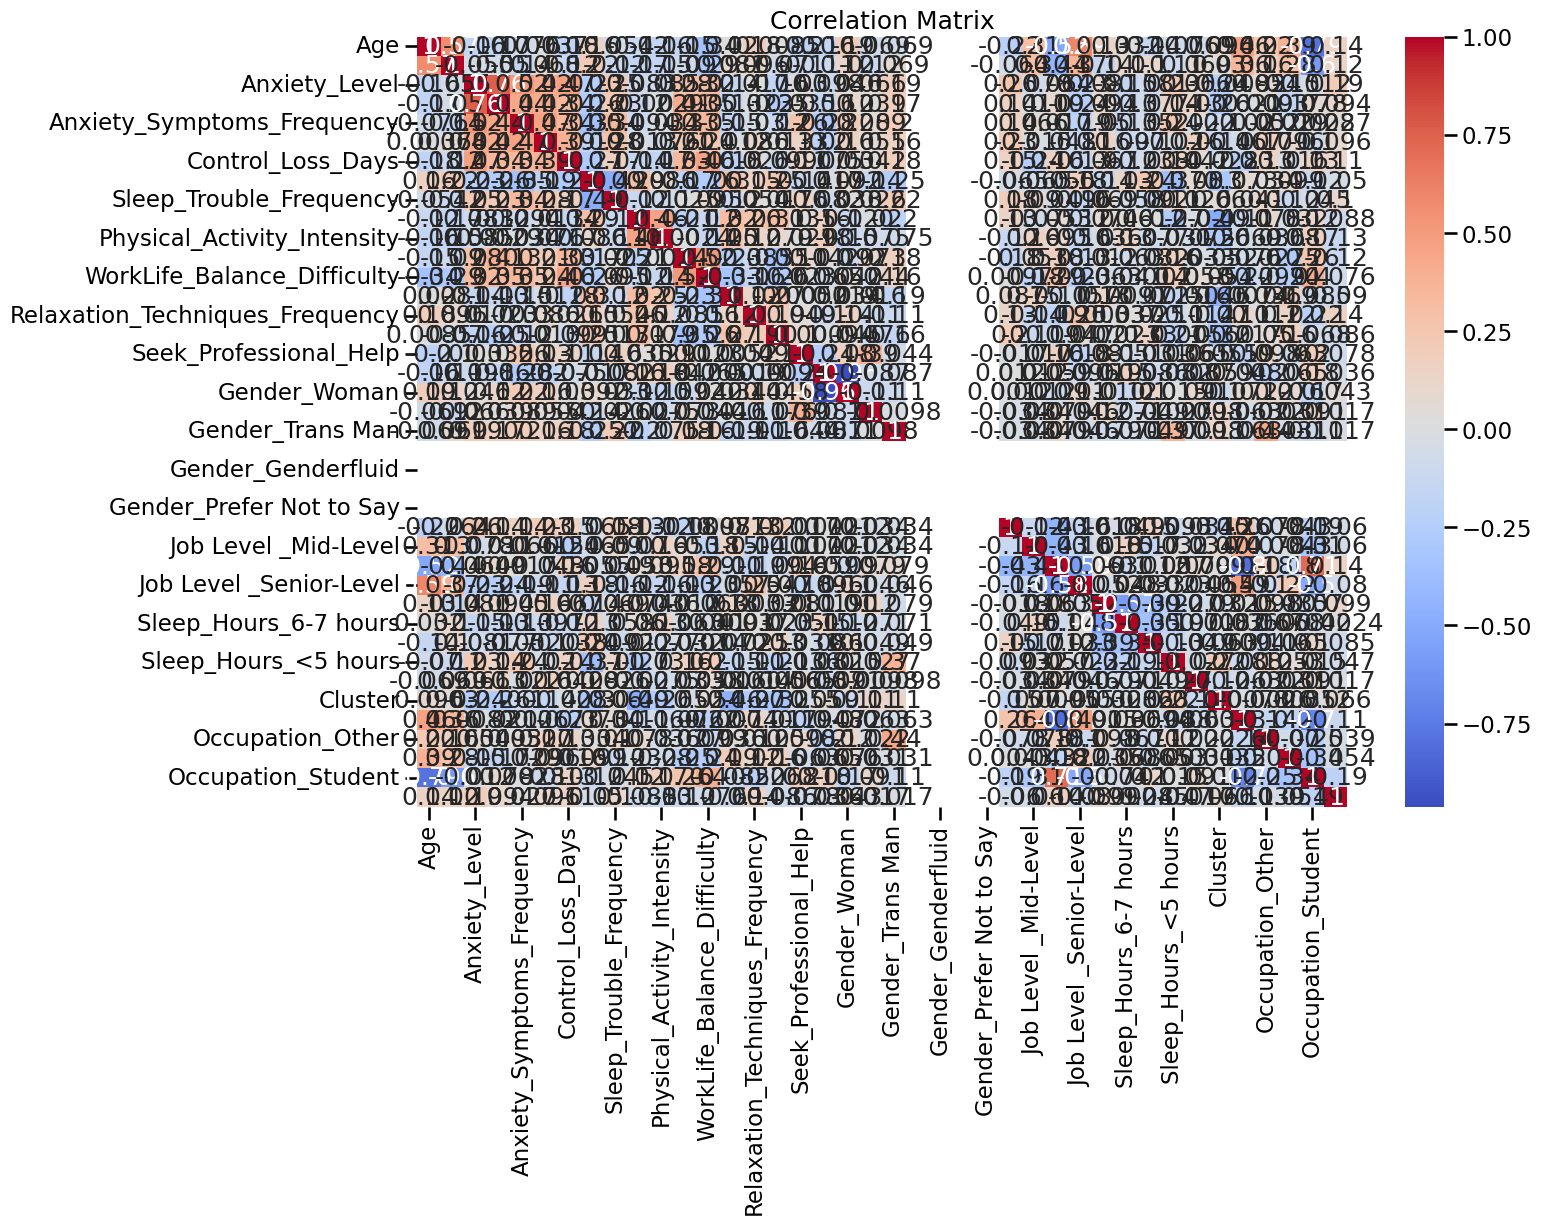

Features correlated with Anxiety Level:
Anxiety_Level                      1.000000
Stress_Level                       0.759976
Anxiety_Symptoms_Frequency         0.517305
Control_Loss_Days                  0.471623
Overwhelmed_Frequency              0.421862
WorkLife_Balance_Difficulty        0.319550
Workload_Stress_Level              0.279787
Job Level _Entry-Level             0.257996
Sleep_Trouble_Frequency            0.247134
Sleep_Hours_<5 hours               0.229967
Gender_Trans Man                   0.193194
Occupation_Unemployed              0.189828
Sleep_Hours_5-6 hours              0.081127
Sleep_Hours_>8 hours               0.066179
Gender_Non Binary                  0.066179
Job Level _Not Applicable          0.063678
Occupation_Other                   0.054387
Gender_Woman                       0.046124
Seek_Professional_Help             0.030415
Relaxation_Techniques_Frequency    0.017484
Occupation_Job Professional        0.008161
Occupation_Student                -0

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [86]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Step 2: Data Preprocessing

# Select the target variables and features
target_anxiety = 'Anxiety_Level'
target_stress = 'Stress_Level'
features = df.drop(columns=[target_anxiety, target_stress])

# Scaling numerical features (optional)
scaler = StandardScaler()
numeric_cols = features.select_dtypes(include=['int64', 'float64']).columns
features[numeric_cols] = scaler.fit_transform(features[numeric_cols])

# Step 3: Train-Test Split
X = features  # All features
y_anxiety = df[target_anxiety]
y_stress = df[target_stress]

X_train_anxiety, X_test_anxiety, y_train_anxiety, y_test_anxiety = train_test_split(X, y_anxiety, test_size=0.2, random_state=42)
X_train_stress, X_test_stress, y_train_stress, y_test_stress = train_test_split(X, y_stress, test_size=0.2, random_state=42)

# Step 4: Correlation Analysis
correlation_matrix = df.corr()

# Plotting heatmap for correlation
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Correlation with Target Variables
correlation_anxiety = correlation_matrix[target_anxiety].sort_values(ascending=False)
correlation_stress = correlation_matrix[target_stress].sort_values(ascending=False)

print("Features correlated with Anxiety Level:")
print(correlation_anxiety)

print("\nFeatures correlated with Stress Level:")
print(correlation_stress)

# Step 5: Feature Importance using Random Forest
# We will build separate models for Anxiety and Stress levels

# For Anxiety Level
rf_anxiety = RandomForestClassifier(random_state=42)
rf_anxiety.fit(X_train_anxiety, y_train_anxiety)
importance_anxiety = pd.Series(rf_anxiety.feature_importances_, index=X.columns)
importance_anxiety = importance_anxiety.sort_values(ascending=False)

print("\nFeature Importance for Anxiety Level Prediction:")
print(importance_anxiety)

# For Stress Level
rf_stress = RandomForestClassifier(random_state=42)
rf_stress.fit(X_train_stress, y_train_stress)
importance_stress = pd.Series(rf_stress.feature_importances_, index=X.columns)
importance_stress = importance_stress.sort_values(ascending=False)

print("\nFeature Importance for Stress Level Prediction:")
print(importance_stress)

# Step 6: Model Evaluation
# Logistic Regression for Anxiety Level
lr_anxiety = LogisticRegression()
lr_anxiety.fit(X_train_anxiety, y_train_anxiety)
y_pred_anxiety = lr_anxiety.predict(X_test_anxiety)
print("\nClassification Report for Anxiety Level Prediction (Logistic Regression):")
print(classification_report(y_test_anxiety, y_pred_anxiety))

# Logistic Regression for Stress Level
lr_stress = LogisticRegression()
lr_stress.fit(X_train_stress, y_train_stress)
y_pred_stress = lr_stress.predict(X_test_stress)
print("\nClassification Report for Stress Level Prediction (Logistic Regression):")
print(classification_report(y_test_stress, y_pred_stress))


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 308
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              103 non-null    int64  
 1   Education Level                  103 non-null    int64  
 2   Anxiety_Level                    103 non-null    float64
 3   Stress_Level                     103 non-null    float64
 4   Anxiety_Symptoms_Frequency       103 non-null    int64  
 5   Overwhelmed_Frequency            103 non-null    int64  
 6   Control_Loss_Days                103 non-null    int64  
 7   Sleep_Quality                    103 non-null    int64  
 8   Sleep_Trouble_Frequency          103 non-null    int64  
 9   Physical_Activity_Frequency      103 non-null    int64  
 10  Physical_Activity_Intensity      103 non-null    int64  
 11  Workload_Stress_Level            103 non-null    int64  
 12  WorkLife_Balance_Diffi

In [88]:
df.describe()

,Age,Education Level,Anxiety_Level,Stress_Level,Anxiety_Symptoms_Frequency,Overwhelmed_Frequency,Control_Loss_Days,Sleep_Quality,Sleep_Trouble_Frequency,Physical_Activity_Frequency,...,Sleep_Hours_6-7 hours,Sleep_Hours_7-8 hours,Sleep_Hours_<5 hours,Sleep_Hours_>8 hours,Cluster,Occupation_Job Professional,Occupation_Other,Occupation_Self-Employed,Occupation_Student,Occupation_Unemployed
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,2.912621,1.640777,2.718447,3.053398,3.194175,3.495146,2.407767,3.262136,2.737864,3.223301,...,0.339806,0.194175,0.067961,0.009709,1.009709,0.291262,0.048544,0.087379,0.543689,0.029126
std,1.321814,0.521205,1.175047,1.139557,0.897253,0.916876,1.403336,0.917810,1.009379,1.101977,...,0.475959,0.397498,0.252910,0.098533,0.857437,0.456566,0.215963,0.283770,0.500523,0.168983
min,1.000000,1.000000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,3.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,2.500000,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,2.000000,3.500000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


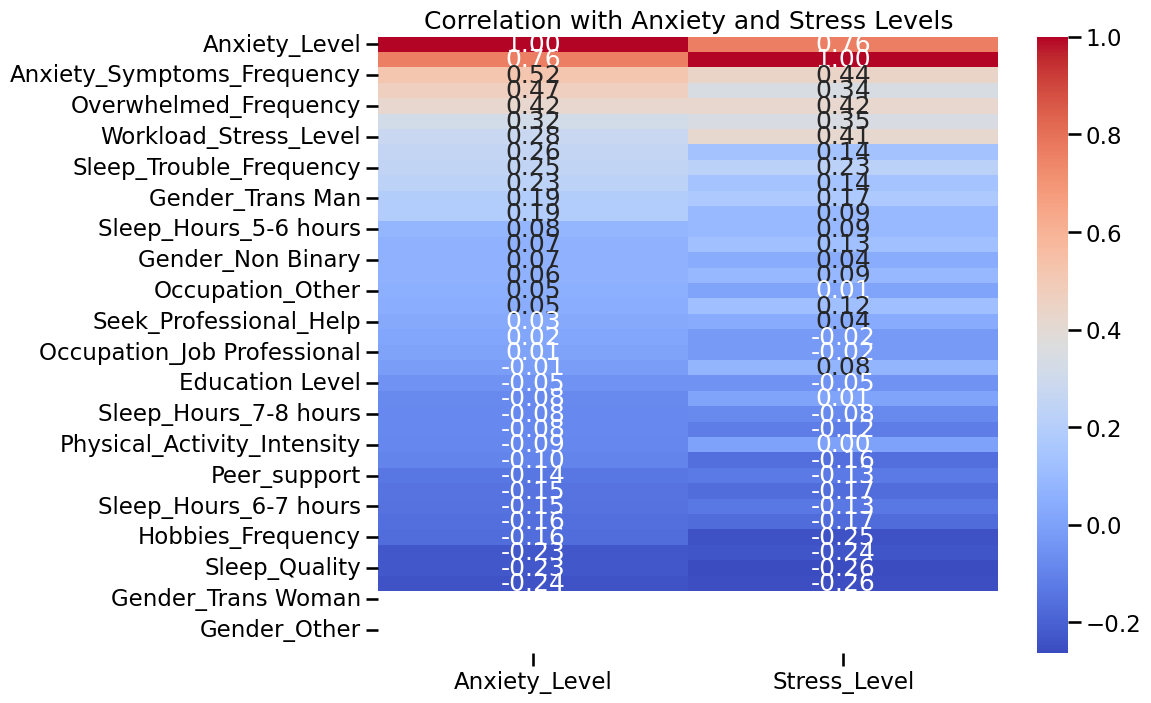

In [89]:
import matplotlib.pyplot as plt

# Filter correlations with target variables only
target_corr = correlation_matrix[[target_anxiety, target_stress]].sort_values(by=target_anxiety, ascending=False)

# Plot improved heatmap for correlations with target variables
plt.figure(figsize=(10, 8))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation with Anxiety and Stress Levels')
plt.show()


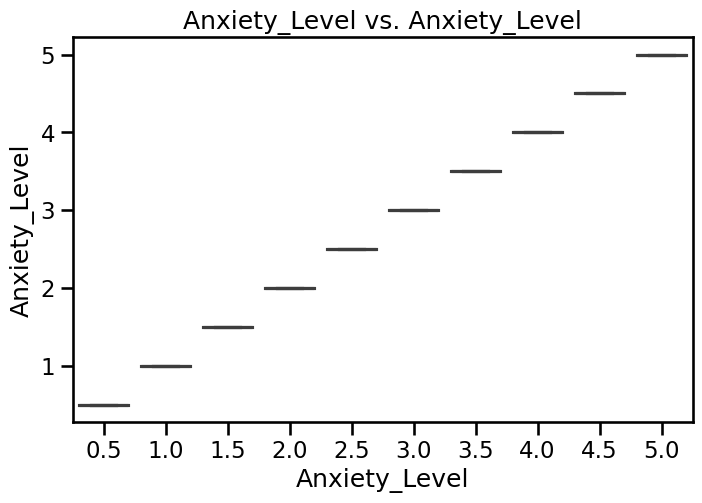

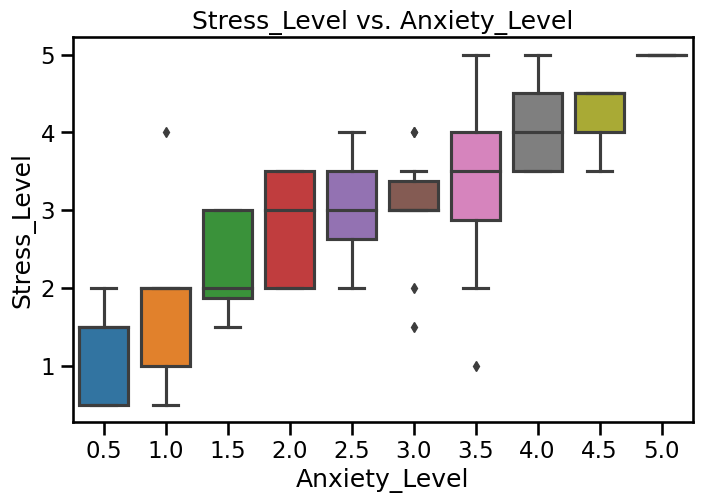

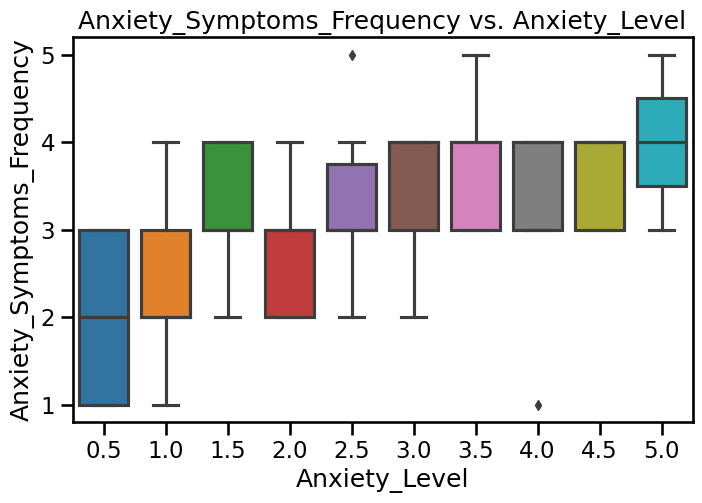

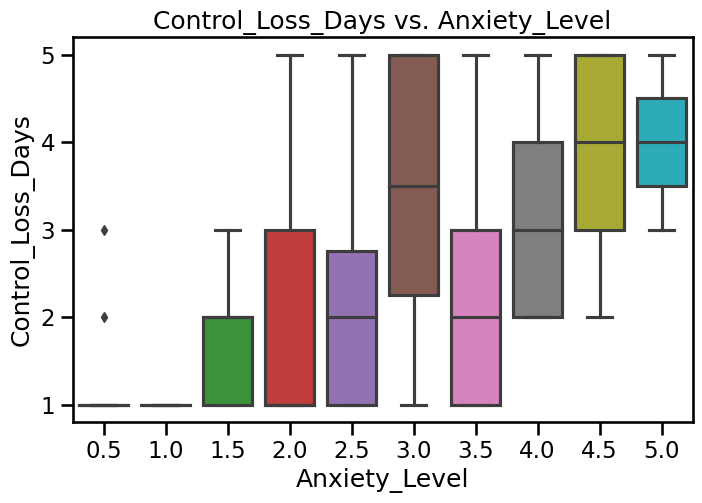

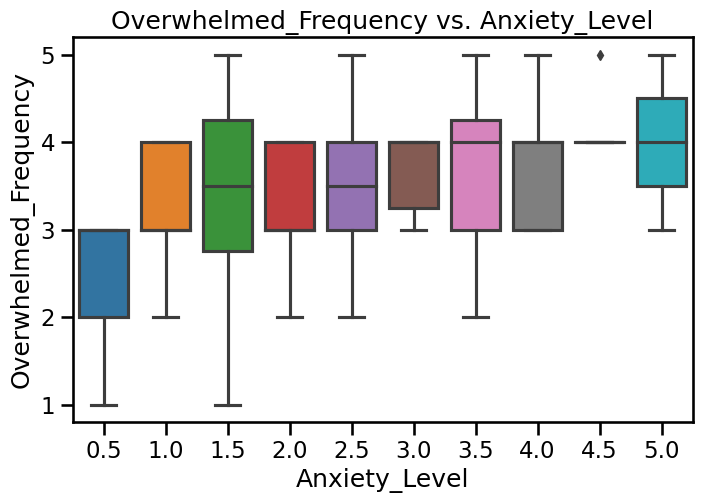

In [93]:
# Plot feature distributions for selected features
important_features = correlation_anxiety.index[:5]  # Top 5 features correlated with Anxiety
for feature in important_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=target_anxiety, y=feature, data=df)
    plt.title(f'{feature} vs. {target_anxiety}')
    plt.show()
